In [23]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages')
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import quandl
import yfinance as yf
from fredapi import Fred
import requests
import os
from bs4 import BeautifulSoup
import re
import tabula
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as amf
from statsmodels.formula.api import glm
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import utils
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from xbbg import blp

## Advanced Retail Sales
Pulling Advanced Retail Sales numbers and concatenating them to an existing spreadsheet. Separating numbers based on revisions.This represents the consumption section of CIGX. 

In [25]:
def retail_sales():
      today=dt.datetime.now()+dt.timedelta(days=1)
      now=today+dt.timedelta(days=1) 
      now=now.strftime('%Y-%m-%d') 
      key=Fred(api_key='9f30ed607bc4d65fe1aaaaf501103192')

#pulling out latest set of advanced retail sales data and adding to existing spreadsheet
#Seasonally Adjusted
      df=blp.bdh(tickers=["RSTATOTL Index","RSTAXAUT Index","RSTAGAST Index","RSTAXAXG Index","RSTAXFD Index","RSBAAUTO Index","RSBAVEHC Index","RSBAFURN Index","RSBAELEC Index","RSBABUIL Index","RSBAFOOD Index","RSBAGROC Index","RSBAHLTH Index","RSBAGAS Index","RSBACLOT Index","RSBASPOR Index","RSBAGENL Index","RSBADEPT Index","RSBAMISC Index","RSBANONS Index","RSBAFDSV Index"], flds=['last_price'],start_date='2001-01-04',end_date=now)
      df.columns = df.columns.droplevel(-1) #drops one of the column header rows
      df.reset_index(inplace=True)
      df.columns=['Date','Total','Total ex Auto','Total ex Gas','Total ex Auto, Gas','Retail Trade','Motor Vehicle and Parts Dealers','Auto and Other Motor','Furniture and Home Stores','Elect and Appl Stores','Building M and Garden Equip','F&B Stores','Grocery Stores','Health and Personal Care','Gas Stations','Clothing and Access Stores','Sports,Hobby,Music,Books','Gen Merchandise Stores','Dept Stores', 'Misc Store Retailers', 'Nonstore Retail', 'F&B Places']  
      df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
      df=df.set_index('Date').resample('m').last()  #resample so we get the same monthly dates
      df.reset_index(inplace=True)
      df=df.tail(3)
      df.reset_index(inplace=True,drop=True)
      df.iloc[:,1:]=df.iloc[:,1:]*1000

      unrevsa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Adv Retail Sales.xlsx',sheet_name='Unrev Adj')
      unrevsa['Date']=pd.to_datetime(unrevsa['Date'],format='%Y-%m-%d')
      unrevsa=pd.concat([unrevsa,df.iloc[2:3,:]])
      unrevsa=unrevsa.drop_duplicates(subset='Date', keep="first")
      unrevsa.reset_index(inplace=True,drop=True)
      print(unrevsa.tail(10))

      rev1sa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Adv Retail Sales.xlsx',sheet_name='1st Rev Adj')
      rev1sa['Date']=pd.to_datetime(rev1sa['Date'],format='%Y-%m-%d')
      rev1sa=pd.concat([rev1sa,df.iloc[1:2,:]])
      rev1sa=rev1sa.drop_duplicates(subset='Date', keep="first")
      rev1sa.reset_index(inplace=True,drop=True)

      rev2sa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Adv Retail Sales.xlsx',sheet_name='2nd Rev Adj')
      rev2sa['Date']=pd.to_datetime(rev2sa['Date'],format='%Y-%m-%d')
      rev2sa=pd.concat([rev2sa,df.iloc[0:1,:]])
      rev2sa=rev2sa.drop_duplicates(subset='Date', keep="first")
      rev2sa.reset_index(inplace=True,drop=True)

#non seasonally adjusted    
      df=blp.bdh(tickers=['RSTUTOTL Index','RSTUXAUT Index','RSTUGAST Index','RSTUXAXG Index','RSTUXFD Index','RSAOAUTO Index','RSAOVEHC Index','RSAOFURN Index','RSAOELEC Index','RSAOBUIL Index','RSAOFOOD Index','RSAOGROC Index','RSAOHLTH Index','RSAOGAS Index','RSAOCLOT Index','RSAOSPOR Index','RSAOGENL Index','RSAODEPT Index','RSAOMISC Index','RSAONONS Index','RSAOFDSV Index'], flds=['last_price'],start_date='2001-01-04',end_date=now)
      df.columns = df.columns.droplevel(-1) #drops one of the column header rows
      df.reset_index(inplace=True)
      df.columns=['Date','Total','Total ex Auto','Total ex Gas','Total ex Auto, Gas','Retail Trade','Motor Vehicle and Parts Dealers','Auto and Other Motor','Furniture and Home Stores','Elect and Appl Stores','Building M and Garden Equip','F&B Stores','Grocery Stores','Health and Personal Care','Gas Stations','Clothing and Access Stores','Sports,Hobby,Music,Books','Gen Merchandise Stores','Dept Stores', 'Misc Store Retailers', 'Nonstore Retail', 'F&B Places']  
      df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
      df=df.set_index('Date').resample('m').last()  #resample so we get the same monthly dates
      df.reset_index(inplace=True)
      df=df.tail(3)
      df.reset_index(inplace=True,drop=True)
      df.iloc[:,1:]=df.iloc[:,1:]*1000

      unrevnsa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Adv Retail Sales.xlsx',sheet_name='Unrev Unadj')
      unrevnsa['Date']=pd.to_datetime(unrevnsa['Date'],format='%Y-%m-%d')
      unrevnsa=pd.concat([unrevnsa,df.iloc[2:3,:]])
      unrevnsa=unrevnsa.drop_duplicates(subset='Date', keep="first")
      unrevnsa.reset_index(inplace=True,drop=True)


      rev1nsa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Adv Retail Sales.xlsx',sheet_name='1st Rev Unadj')
      rev1nsa['Date']=pd.to_datetime(rev1nsa['Date'],format='%Y-%m-%d')
      rev1nsa=pd.concat([rev1nsa,df.iloc[1:2,:]])
      rev1nsa=rev1nsa.drop_duplicates(subset='Date', keep="first")
      rev1nsa.reset_index(inplace=True,drop=True)


      rev2nsa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Adv Retail Sales.xlsx',sheet_name='2nd Rev Unadj')
      rev2nsa['Date']=pd.to_datetime(rev2nsa['Date'],format='%Y-%m-%d')
      rev2nsa=pd.concat([rev2nsa,df.iloc[0:1,:]])
      rev2nsa=rev2nsa.drop_duplicates(subset='Date', keep="first")
      rev2nsa.reset_index(inplace=True,drop=True)

      writer = pd.ExcelWriter(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Adv Retail Sales.xlsx')
      unrevsa.to_excel(writer, sheet_name='Unrev Adj',index=False)  
      rev1sa.to_excel(writer, sheet_name='1st Rev Adj',index=False)  
      rev2sa.to_excel(writer, sheet_name='2nd Rev Adj',index=False) 
      unrevnsa.to_excel(writer, sheet_name='Unrev Unadj',index=False)  
      rev1nsa.to_excel(writer, sheet_name='1st Rev Unadj',index=False)  
      rev2nsa.to_excel(writer, sheet_name='2nd Rev Unadj',index=False)  
      writer.close()


#to prepare the information to be used to help predict GDP. Because Advanced retail sales is released 2 wks post month end, 2 mos worth can be used to help predict current GDP figures

      headers=list(unrevsa)
      remove=['Total ex Auto', 'Total ex Gas', 'Total ex Auto, Gas', 'Retail Trade']
    
      for x in remove:
         headers.remove(x) #take that the columns that you dont want to include
    
      unrevsa=unrevsa[headers]
      rev1sa=rev1sa[headers]
      rev2sa=rev2sa[headers]
    
#to rename headers so can merge file    
      for h in headers:
         if h=='Date':continue
         else:
            unrevsa.rename(columns={h:'Unrevised '+h},inplace=True)
            rev1sa.rename(columns={h:'1st Rev '+h},inplace=True)
            rev2sa.rename(columns={h:'2nd Rev '+h},inplace=True)
    
#retail sales releases data 0.5 mos post month end. We can use two months of data - unrev (the last of 2 figures of most recent qtr) + 1st rev (1st of 2 figures of most recent qtr) and compare against 2nd rev (average of the 1st 2 numbers of the previous qtr).
      unrevsa['qtr_year'] = pd.to_datetime(unrevsa['Date']).dt.to_period('Q')
      unrevsa=unrevsa.groupby(['qtr_year']).head(2)              
      unrevsa=unrevsa.set_index('Date').resample('Q').last()
      unrevsa.reset_index(inplace=True)
      unrevsa.drop('qtr_year',axis=1,inplace=True)

      rev1sa['qtr_year'] = pd.to_datetime(rev1sa['Date']).dt.to_period('Q')
      rev1sa=rev1sa.groupby(['qtr_year']).head(2)              
      rev1sa=rev1sa.set_index('Date').resample('Q').first()
      rev1sa.reset_index(inplace=True)
      rev1sa.drop('qtr_year',axis=1,inplace=True)

      rev2sa['qtr_year'] = pd.to_datetime(rev2sa['Date']).dt.to_period('Q')
      rev2sa=rev2sa.groupby(['qtr_year']).head(2)       
      rev2sa=rev2sa.set_index('Date').resample('Q').sum(numeric_only=True)
      rev2sa.reset_index(inplace=True)
           
      retail=pd.merge(pd.merge(unrevsa,rev1sa,on='Date',how='outer'),rev2sa,on='Date',how='outer')
      retail=retail.sort_values(by='Date')
      retail.reset_index(inplace=True,drop=True)
      print(retail.tail(10))    
    
 #calculating QoQ %
      retailq=retail.copy()         
      for h in headers:
         if h=='Date':continue
         else:
                retailq[h+ ' QoQ %']=(retailq['Unrevised '+h]+retailq['1st Rev '+h])/retailq['2nd Rev '+h].shift(1)-1
                retailq.drop(['Unrevised '+h,'1st Rev '+h,"2nd Rev "+h],axis=1,inplace=True)
      print(retailq)

      writer = pd.ExcelWriter(r'\\Mac\Home\Downloads\US retail merge.xlsx') 
      retail.to_excel(writer, sheet_name='Quarterly Figures',index=False)          
      retailq.to_excel(writer, sheet_name='QoQ %',index=False) 
      writer.close()
    
      return retail,retailq
                               
retail,retailq=retail_sales()

          Date     Total  Total ex Auto  Total ex Gas  Total ex Auto, Gas  \
259 2023-11-30  705692.0       571188.0      651248.0            516744.0   
260 2023-12-31  709890.0       573383.0      656721.0            520214.0   
261 2024-01-31  700291.0       567860.0      647882.0            515451.0   
262 2024-02-29  700727.0       566790.0      647683.0            513746.0   
263 2024-03-31  707682.0       574852.0      653368.0            520538.0   
264 2024-04-30  705180.0       572863.0      648988.0            516671.0   
265 2024-05-31  703088.0       569035.0      649503.0            515450.0   
266 2024-06-30  704324.0       573593.0      652406.0            521675.0   
267 2024-07-31  709668.0       576084.0      657095.0            523511.0   
268 2024-08-31  710773.0       576478.0      658790.0            524495.0   

     Retail Trade  Motor Vehicle and Parts Dealers  Auto and Other Motor  \
259      610995.0                         134504.0              122970.0   


## Construction Value in Place

Pulling out construction spending by revisions and concatenating them to an existing spreadsheet. This represents the I part of CIGX


In [27]:
def construction():
      today=dt.datetime.now()+dt.timedelta(days=1)
      now=today+dt.timedelta(days=1) 
      now=now.strftime('%Y-%m-%d') 
      key=Fred(api_key='9f30ed607bc4d65fe1aaaaf501103192')

#pulling out latest set of construction value in place (spending) data and adding to existing spreadsheet
#Seasonally Adjusted
      df=blp.bdh(tickers=['CNSTTOTA Index',"CNSTRESI Index",'CNSTNRES Index'], flds=['last_price'],start_date='2001-01-04',end_date=now)
      df.columns = df.columns.droplevel(-1) #drops one of the column header rows
      df.reset_index(inplace=True)
      df.columns=['Date','Total Construction','Residential','Nonresidential',]  
      df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
      df=df.set_index('Date').resample('m').last()  #resample so we get the same monthly dates
      df.reset_index(inplace=True)
      df=df.tail(4)
      df.reset_index(inplace=True,drop=True)

      unrevsa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Construction Value in Place.xlsx',sheet_name='Unrev Adj')
      unrevsa['Date']=pd.to_datetime(unrevsa['Date'],format='%Y-%m-%d')
      unrevsa=pd.concat([unrevsa,df.iloc[3:4,:]])
      unrevsa=unrevsa.drop_duplicates(subset='Date', keep="first")
      unrevsa.reset_index(inplace=True,drop=True)
      print(unrevsa.tail(10))

      rev1sa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Construction Value in Place.xlsx',sheet_name='1st Rev Adj')
      rev1sa['Date']=pd.to_datetime(rev1sa['Date'],format='%Y-%m-%d')
      rev1sa=pd.concat([rev1sa,df.iloc[2:3,:]])
      rev1sa=rev1sa.drop_duplicates(subset='Date', keep="first")
      rev1sa.reset_index(inplace=True,drop=True)

    
      rev2sa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Construction Value in Place.xlsx',sheet_name='2nd Rev Adj')
      rev2sa['Date']=pd.to_datetime(rev2sa['Date'],format='%Y-%m-%d')
      rev2sa=pd.concat([rev2sa,df.iloc[1:2,:]])
      rev2sa=rev2sa.drop_duplicates(subset='Date', keep="first")
      rev2sa.reset_index(inplace=True,drop=True)
  

      rev3sa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Construction Value in Place.xlsx',sheet_name='3rd Rev Adj')
      rev3sa['Date']=pd.to_datetime(rev3sa['Date'],format='%Y-%m-%d')
      rev3sa=pd.concat([rev3sa,df.iloc[0:1,:]])
      rev3sa=rev3sa.drop_duplicates(subset='Date', keep="first")
      rev3sa.reset_index(inplace=True,drop=True)


#Seasonally Unadjusted
      df=blp.bdh(tickers=['CNNSTOTA Index',"CNNSRESI Index",'CNNSNRES Index'], flds=['last_price'],start_date='2001-01-04',end_date=now)
      df.columns = df.columns.droplevel(-1) #drops one of the column header rows
      df.reset_index(inplace=True)
      df.columns=['Date','Total Construction','Residential','Nonresidential',]  
      df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
      df=df.set_index('Date').resample('m').last()  #resample so we get the same monthly dates
      df.reset_index(inplace=True)
      df=df.tail(4)
      df.reset_index(inplace=True,drop=True)

      unrevnsa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Construction Value in Place.xlsx',sheet_name='Unrev Unadj')
      unrevnsa['Date']=pd.to_datetime(unrevnsa['Date'],format='%Y-%m-%d')
      unrevnsa=pd.concat([unrevnsa,df.iloc[3:4,:]])
      unrevnsa=unrevnsa.drop_duplicates(subset='Date', keep="first")
      unrevnsa.reset_index(inplace=True,drop=True)


      rev1nsa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Construction Value in Place.xlsx',sheet_name='1st Rev Unadj')
      rev1nsa['Date']=pd.to_datetime(rev1nsa['Date'],format='%Y-%m-%d')
      rev1nsa=pd.concat([rev1nsa,df.iloc[2:3,:]])
      rev1nsa=rev1nsa.drop_duplicates(subset='Date', keep="first")
      rev1nsa.reset_index(inplace=True,drop=True)

    
      rev2nsa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Construction Value in Place.xlsx',sheet_name='2nd Rev Unadj')
      rev2nsa['Date']=pd.to_datetime(rev2nsa['Date'],format='%Y-%m-%d')
      rev2nsa=pd.concat([rev2nsa,df.iloc[1:2,:]])
      rev2nsa=rev2nsa.drop_duplicates(subset='Date', keep="first")
      rev2nsa.reset_index(inplace=True,drop=True)


      rev3nsa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Construction Value in Place.xlsx',sheet_name='3rd Rev Unadj')
      rev3nsa['Date']=pd.to_datetime(rev3nsa['Date'],format='%Y-%m-%d')
      rev3nsa=pd.concat([rev3nsa,df.iloc[0:1,:]])
      rev3nsa=rev3nsa.drop_duplicates(subset='Date', keep="first")
      rev3nsa.reset_index(inplace=True,drop=True)


      writer = pd.ExcelWriter(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Construction Value in Place.xlsx')
      unrevsa.to_excel(writer, sheet_name='Unrev Adj',index=False)  
      rev1sa.to_excel(writer, sheet_name='1st Rev Adj',index=False)  
      rev2sa.to_excel(writer, sheet_name='2nd Rev Adj',index=False) 
      rev3sa.to_excel(writer, sheet_name='3rd Rev Adj',index=False) 
      unrevnsa.to_excel(writer, sheet_name='Unrev Unadj',index=False)  
      rev1nsa.to_excel(writer, sheet_name='1st Rev Unadj',index=False)  
      rev2nsa.to_excel(writer, sheet_name='2nd Rev Unadj',index=False)  
      rev3nsa.to_excel(writer, sheet_name='3rd Rev Unadj',index=False)
      writer.close()

#to configure the file so that it can be used later to help extroplate the current GDP value
#construction data is released 1 mos post month end, therefore only 1 mos of data can be used
#to rename headers so can merge file
      headers=list(unrevsa)
      for h in headers:
         if h=='Date':continue
         else:
            unrevsa.rename(columns={h:'Unrevised '+h},inplace=True)
            rev1sa.rename(columns={h:'Revised '+h},inplace=True)

      constr=unrevsa.merge(rev1sa,on='Date',how='outer')
      constr=constr.sort_values(by='Date')
      constr.reset_index(inplace=True,drop=True)

      constrq=constr.copy()
      constrq=constrq.set_index('Date').resample('Q').first()
      constrq.reset_index(inplace=True)

      for h in headers:
        if h=='Date':continue
        else:           
           constrq[h+ ' QoQ %']=constrq['Unrevised '+h]/constrq['Revised '+h].shift(1)-1
           constrq.drop(['Unrevised '+h,"Revised "+h],axis=1,inplace=True)
      print(constr.tail(10))
      print(constrq.tail(10))
      writer = pd.ExcelWriter(r'\\Mac\Home\Downloads\construction merge.xlsx')
      constr.to_excel(writer, sheet_name='Monthly Figures',index=False)  
      constrq.to_excel(writer, sheet_name='QoQ %',index=False) 
      writer.close()
    
      return constr,constrq

constr,constrq=construction()

          Date  Total Construction  Residential  Nonresidential
244 2023-10-31           2027072.0     895130.0       1131941.0
245 2023-11-30           2050058.0     907395.0       1142663.0
246 2023-12-31           2096012.0     922161.0       1173851.0
247 2024-01-31           2102434.0     912206.0       1190228.0
248 2024-02-29           2091511.0     912718.0       1178793.0
249 2024-03-31           2083926.0     895926.0       1188000.0
250 2024-04-30           2099039.0     902292.0       1196747.0
251 2024-05-31           2139792.0     930464.0       1209329.0
252 2024-06-30           2148444.0     939806.0       1208638.0
253 2024-07-31           2162683.0     952897.0       1209786.0
          Date  Unrevised Total Construction  Unrevised Residential  \
245 2023-10-31                     2027072.0               895130.0   
246 2023-11-30                     2050058.0               907395.0   
247 2023-12-31                     2096012.0               922161.0   
248 2024-01-

## Trade

Pulling Import and Export Figures by revisions and concatenating them to already existing numbers. This represents the X of CIGX.

In [29]:
def trade():
      today=dt.datetime.now()+dt.timedelta(days=1)
      now=today+dt.timedelta(days=1) 
      now=now.strftime('%Y-%m-%d') 
      key=Fred(api_key='9f30ed607bc4d65fe1aaaaf501103192')

#pulling out latest set of trade data and adding to existing spreadsheet
#Seasonally Adjusted
      df=blp.bdh(tickers=['USTBEXP Index','USTBEGD Index','USTBESRV Index','USTBIMP Index','USTBIGD Index','USTBISRV Index'], flds=['last_price'],start_date='2001-01-04',end_date=now)
      df.columns = df.columns.droplevel(-1) #drops one of the column header rows
      df.reset_index(inplace=True)
      df.columns=['Date','Exports-Total','Exports-Goods','Exports-Services','Imports-Total','Imports-Goods','Imports-Services',]
      df['Balance-Total']=df['Exports-Total']-df['Imports-Total']
      df['Balance-Goods']=df['Exports-Goods']-df['Imports-Goods']
      df['Balance-Services']=df['Exports-Services']-df['Imports-Services']
      df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
      df=df.set_index('Date').resample('m').last()  #resample so we get the same monthly dates
      df.reset_index(inplace=True)
      df=df.tail(4)
      df.reset_index(inplace=True,drop=True)
      df.iloc[:,1:]=df.iloc[:,1:]*1000
      df=df[['Date','Balance-Total','Balance-Goods','Balance-Services','Exports-Total','Exports-Goods','Exports-Services','Imports-Total','Imports-Goods','Imports-Services']]

      unrevsa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\US Trade Balance V2.xlsx',sheet_name='Unrev Adj')
      unrevsa['Date']=pd.to_datetime(unrevsa['Date'],format='%Y-%m-%d')
      unrevsa=pd.concat([unrevsa,df.iloc[3:4,:]])
      unrevsa=unrevsa.drop_duplicates(subset='Date', keep="first")
      unrevsa.reset_index(inplace=True,drop=True)
      print(unrevsa.tail(10))

      rev1sa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\US Trade Balance V2.xlsx',sheet_name='1st Rev Adj')
      rev1sa['Date']=pd.to_datetime(rev1sa['Date'],format='%Y-%m-%d')
      rev1sa=pd.concat([rev1sa,df.iloc[2:3,:]])
      rev1sa=rev1sa.drop_duplicates(subset='Date', keep="first")
      rev1sa.reset_index(inplace=True,drop=True)
   
      rev2sa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\US Trade Balance V2.xlsx',sheet_name='2nd Rev Adj')
      rev2sa['Date']=pd.to_datetime(rev2sa['Date'],format='%Y-%m-%d')
      rev2sa=pd.concat([rev2sa,df.iloc[1:2,:]])
      rev2sa=rev2sa.drop_duplicates(subset='Date', keep="first")
      rev2sa.reset_index(inplace=True,drop=True)

      rev3sa=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\US Trade Balance V2.xlsx',sheet_name='3rd Rev Adj')
      rev3sa['Date']=pd.to_datetime(rev3sa['Date'],format='%Y-%m-%d')
      rev3sa=pd.concat([rev3sa,df.iloc[0:1,:]])
      rev3sa=rev3sa.drop_duplicates(subset='Date', keep="first")
      rev3sa.reset_index(inplace=True,drop=True)

      writer = pd.ExcelWriter(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\US Trade Balance V2.xlsx')
      unrevsa.to_excel(writer, sheet_name='Unrev Adj',index=False)  
      rev1sa.to_excel(writer, sheet_name='1st Rev Adj',index=False)  
      rev2sa.to_excel(writer, sheet_name='2nd Rev Adj',index=False) 
      rev3sa.to_excel(writer, sheet_name='3rd Rev Adj',index=False) 
      writer.close()

#calculating numbers to be later used to f/c GDP
#trade #s are released 6 wks post month end, so can only use 1 mos of data to help predict current mos GDP
#to rename headers so can merge file    
      headers=list(unrevsa)
      for h in headers:
         if h=='Date':continue
         else:
            unrevsa.rename(columns={h:'Unrevised '+h},inplace=True)
            rev1sa.rename(columns={h:'Revised '+h},inplace=True)
     
      trade=unrevsa.merge(rev1sa,on='Date',how='outer')
      trade=trade.sort_values(by='Date')
      trade.reset_index(inplace=True,drop=True)

      tradeq=trade.copy()
      tradeq=tradeq.set_index('Date').resample('Q').first()
      tradeq.reset_index(inplace=True)

      for h in headers:
         if h=='Date':continue
         else:
            tradeq[h+ ' QoQ %']=tradeq['Unrevised '+h]/tradeq['Revised '+h].shift(1)-1
            tradeq.drop(['Unrevised '+h,"Revised "+h],axis=1,inplace=True)

      print(trade.tail(10))
      print(tradeq.tail(10))

      writer = pd.ExcelWriter(r'\\Mac\Home\Downloads\trade merge.xlsx')
      trade.to_excel(writer, sheet_name='Quarterly Figures',index=False)  
      tradeq.to_excel(writer, sheet_name='QoQ %',index=False) 
      writer.close()  

      return trade,tradeq
    
trade,tradeq=trade()

          Date  Balance-Total  Balance-Goods  Balance-Services  Exports-Total  \
273 2023-10-31       -64255.0       -89795.0           25540.0       258793.0   
274 2023-11-30       -63207.0       -89400.0           26193.0       253737.0   
275 2023-12-31       -62201.0       -89075.0           26874.0       258248.0   
276 2024-01-31       -67434.0       -91599.0           24165.0       257193.0   
277 2024-02-29       -68900.0       -91428.0           22527.0       263014.0   
278 2024-03-31       -69372.0       -92505.0           23133.0       257620.0   
279 2024-04-30       -74559.0       -99209.0           24650.0       263666.0   
280 2024-05-31       -75071.0      -100153.0           25081.0       261661.0   
281 2024-06-30       -73109.0       -97352.0           24244.0       265938.0   
282 2024-07-31       -78791.0      -103131.0           24340.0       266603.0   

     Exports-Goods  Exports-Services  Imports-Total  Imports-Goods  \
273       173487.0           85306.0  

## Changes in Business Inventories

These are the changes in business inventories, pulled by their different revisions, and concatenated to a spreadsheet. This is part of I in CIGX.

In [78]:
def bus_inv():
      today=dt.datetime.now()+dt.timedelta(days=1)
      now=today+dt.timedelta(days=1) 
      now=now.strftime('%Y-%m-%d') 
      key=Fred(api_key='9f30ed607bc4d65fe1aaaaf501103192')

#pulling out latest set of trade data and adding to existing spreadsheet
#Seasonally Adjusted (NSA is not avail on BBG)
      df=blp.bdh(tickers=['MTIB Index',], flds=['last_price'],start_date='2001-01-04',end_date=now)
      df.columns = df.columns.droplevel(-1) #drops one of the column header rows
      df.reset_index(inplace=True)
      df.columns=['Date','Business Inventories',]
      df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
      df=df.set_index('Date').resample('m').last()  #resample so we get the same monthly dates
      df.reset_index(inplace=True)
      df=df.tail(2)
      df.reset_index(inplace=True,drop=True)
      df.iloc[:,1:]=df.iloc[:,1:]*1000

      businv=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Business Inventories.xlsx',sheet_name='SA')
      businv['Date']=pd.to_datetime(businv['Date'],format='%Y-%m-%d')
      
      unrevsa=businv[['Date','Unrev']].copy()
      df.rename(columns={'Business Inventories':'Unrev'},inplace=True)
      unrevsa=pd.concat([unrevsa,df.iloc[1:2,:]])
      unrevsa=unrevsa.drop_duplicates(subset='Date', keep="first")
 
      rev1sa=businv[['Date','Rev 1']].copy().dropna()
      df.rename(columns={'Unrev':'Rev 1'},inplace=True)
      rev1sa=pd.concat([rev1sa,df.iloc[0:1,:]])
      rev1sa=rev1sa.drop_duplicates(subset='Date', keep="first")
 
      businv=unrevsa.merge(rev1sa,on='Date',how='outer')
      businv=businv.sort_values(by='Date')
      businv.reset_index(inplace=True,drop=True)
      print(businv.tail(10))
 
      writer = pd.ExcelWriter(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Business Inventories.xlsx')
      businv.to_excel(writer, sheet_name='SA',index=False)  
      writer.close()

    
#business inventories are released 7 wks post month end, therefore we can only use 1 mos to be used later to help predict current quarter's GDP  
      businvq=businv.copy()  
      businvq=businvq.set_index('Date').resample('Q').first()
      businvq.reset_index(inplace=True)
      businvq['Business Inventories Chg']=businvq['Unrev']-businvq['Rev 1'].shift(1)
      businvq['Business Inventories QoQ %']=businvq['Business Inventories Chg']/businvq['Rev 1'].shift(1)
      businvq=businvq[['Date','Business Inventories QoQ %']]
      print(businvq.tail(10))

      writer = pd.ExcelWriter(r'\\Mac\Home\Downloads\inventories merge.xlsx')
      businv.to_excel(writer, sheet_name='Monthly Figures',index=False)  
      businvq.to_excel(writer, sheet_name='QoQ %',index=False) 
      writer.close()

      return businv,businvq

businv,businvq=bus_inv()

          Date      Unrev      Rev 1
262 2023-10-31  2550016.0  2550320.0
263 2023-11-30  2548858.0  2546845.0
264 2023-12-31  2556035.0  2554770.0
265 2024-01-31  2555003.0  2556109.0
266 2024-02-29  2567540.0  2540743.0
267 2024-03-31  2538980.0  2537490.0
268 2024-04-30  2545190.0  2546223.0
269 2024-05-31  2558450.0  2558827.0
270 2024-06-30  2567540.0  2565930.0
271 2024-07-31  2574920.0        NaN
         Date  Business Inventories QoQ %
82 2022-06-30                    0.048119
83 2022-09-30                    0.036644
84 2022-12-31                    0.014491
85 2023-03-31                    0.005146
86 2023-06-30                    0.031372
87 2023-09-30                   -0.001528
88 2023-12-31                    0.004267
89 2024-03-31                    0.001836
90 2024-06-30                   -0.004272
91 2024-09-30                    0.011270


## GDP

Pulling different GDP revisions and adding to an existing spreadsheet. This is actual GDP reported and the different components of CIGX which are released earlier than GDP (3 wks post quarter end for Advanced), will be regressed against it later on. 

In [33]:
def gdp():

      today=dt.datetime.now()
      now=today+dt.timedelta(days=1) 
      now=now.strftime('%Y-%m-%d') 
      key=Fred(api_key='9f30ed607bc4d65fe1aaaaf501103192')
#nominal
#this gets the latest values as bbg can not pull different revisions
      df=blp.bdh(tickers=['GDP CUR$ Index',], flds=['last_price'],start_date='2001-01-04',end_date=now)
      df.columns = df.columns.droplevel(-1) #drops one of the column header rows
      df.reset_index(inplace=True)
      df.columns=['Date','Adv Estimate']
      df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
      df=df.tail(2)
      df.reset_index(inplace=True,drop=True)
    
#adding a 3rd estimate column and moving previous period's gdp data to that column. GDP data is revised every month post the end of the qtr
      df['3rd Estimate']=''
      df.loc[0,'3rd Estimate']=df.loc[0,'Adv Estimate']
      df.loc[0,'Adv Estimate']=''
      print(df.tail(10))
#getting the values to be added to spreadsheet later
      prev_date=df.loc[0,'Date'].strftime('%Y-%m-%d')
      est_3rd=df.loc[0,'3rd Estimate']

      last_date=df.loc[1,'Date'].date()
      df_nom=df.copy()
    
#pulling the spreadsheet with past data
      nom=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\US GDP.xlsx',sheet_name='Nom GDP')
      print(nom.tail(10))
      nom_len=len(nom)

#real
#this gets the latest values as bbg can not pull different revisions
      df=blp.bdh(tickers=['GDP CHWG Index',], flds=['last_price'],start_date='2001-01-04',end_date=now)
      df.columns = df.columns.droplevel(-1) #drops one of the column header rows
      df.reset_index(inplace=True)
      df.columns=['Date','Adv Estimate']
      df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
      df=df.tail(2)
      df.reset_index(inplace=True,drop=True)
    
#adding a 3rd estimate column and moving previous period's gdp data to that column. GDP data is revised every month post the end of the qtr
      df['3rd Estimate']=''
      df.loc[0,'3rd Estimate']=df.loc[0,'Adv Estimate']
      df.loc[0,'Adv Estimate']=''

#getting the values to be added to the spreadsheet later
      est_3rd_real=df.loc[0,'3rd Estimate']
      print(df.tail(10))
      df_real=df.copy()

#pulling the spreadsheet with past data
      real=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\US GDP.xlsx',sheet_name='Real GDP')
      print(real.tail(10))
      real_len=len(real)

#since we don't have different revisions from bberg, we have to make sure we're only updating numbers before the most GDP figures are updated and henced need to be within 60 days of the most recent quarters 
      if  today.date() < last_date+dt.timedelta(days=60):
          print("can adjust gdp")

#replacing the previous qtr's 3rd Estimate Value with the latest figures and appending the latest quarters just released (unrevised) GDP #'s
#for both real and nominal gdp
          row=nom.index.get_loc(nom[nom['Date']== prev_date].index[0])
          nom.loc[row,'3rd Estimate']=est_3rd
          nom=pd.concat([nom,df_nom.iloc[1:2,:]])
          nom=nom.drop_duplicates(subset='Date', keep="first")
          nom.reset_index(drop=True,inplace=True)
          print(nom)

          row=real.index.get_loc(real[real['Date']== prev_date].index[0])
          real.loc[row,'3rd Estimate']=est_3rd_real
          real=pd.concat([real,df_real.iloc[1:2,:]])
          real=real.drop_duplicates(subset='Date', keep="first")
          real.reset_index(drop=True,inplace=True)
          print(real)

          writer = pd.ExcelWriter(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\US GDP.xlsx')
          nom.to_excel(writer, sheet_name='Nom GDP',index=False)  
          real.to_excel(writer, sheet_name='Real GDP',index=False)  
          writer.close()

      else: 
          print("cannot adjust gdp, please manually adjust")

      return nom

gdpdf=gdp()

C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\3722207376.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[0,'Adv Estimate']=''


        Date Adv Estimate 3rd Estimate
0 2024-03-31                  28269.17
1 2024-06-30     28652.34             
         Date  Adv Estimate  3rd Estimate
88 2022-03-31     24382.683     24386.734
89 2022-06-30     24851.809     25248.476
90 2022-09-30     25663.289     25723.900
91 2022-12-31     26132.458     26137.992
92 2023-03-31     26465.865     26529.774
93 2023-06-30     26834.953     27063.012
94 2023-09-30     27623.543     27610.128
95 2023-12-31     27938.831     27957.000
96 2024-03-31     28284.500     28269.170
97 2024-06-30     28629.150           NaN
        Date Adv Estimate 3rd Estimate
0 2024-03-31                   22758.8
1 2024-06-30      22924.9             
         Date  Adv Estimate  3rd Estimate  Latest Estimate
88 2022-03-31     19735.895     19727.918        19924.088
89 2022-06-30     19681.682     19895.271        19895.271
90 2022-09-30     20021.721     20054.663        20054.663
91 2022-12-31     20198.091     20182.491              NaN
92 2023-0

C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\3722207376.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[0,'Adv Estimate']=''


## Regression of the Main Components of CIGX

Taking the earlier dataframes created of adv retail sales, construction, inventories and trade figures and regressing against GDP figures. We used OLS, and then improved on it using RIDGE and Polynomial adjustments


2024-03-31 00:00:00
R2 (training): 0.905
R2 (test): 0.375
OLS Regression R2 0.8873964112654732
training MSE (using sklearn function): 1.6768965305128013e-05
Ridge R2 (training): 0.910
Ridge R2 (test): 0.613
Ridge Regression R2 0.8995871703912414


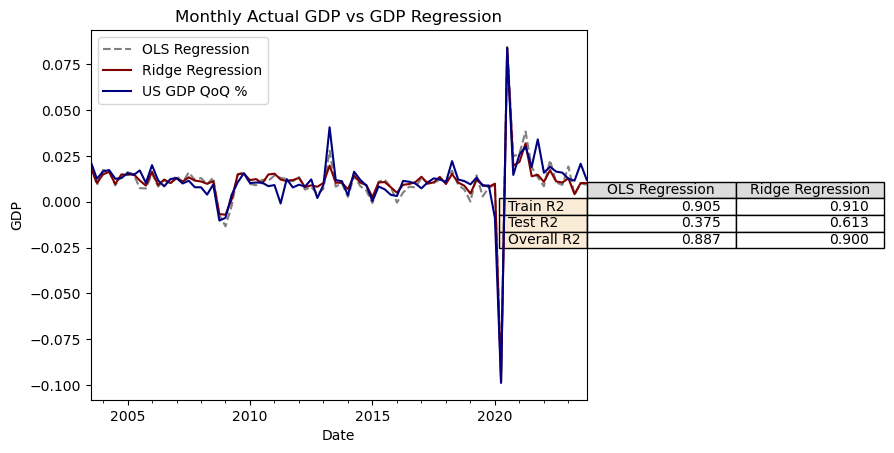

2024-06-30 00:00:00
R2 (training): 0.915
R2 (test): 0.729
OLS Regression R2 0.8738296703357656
training MSE (using sklearn function): 1.0296634700727566e-05
Ridge R2 (training): 0.906
Ridge R2 (test): 0.831
Ridge Regression R2 0.8906691987658297


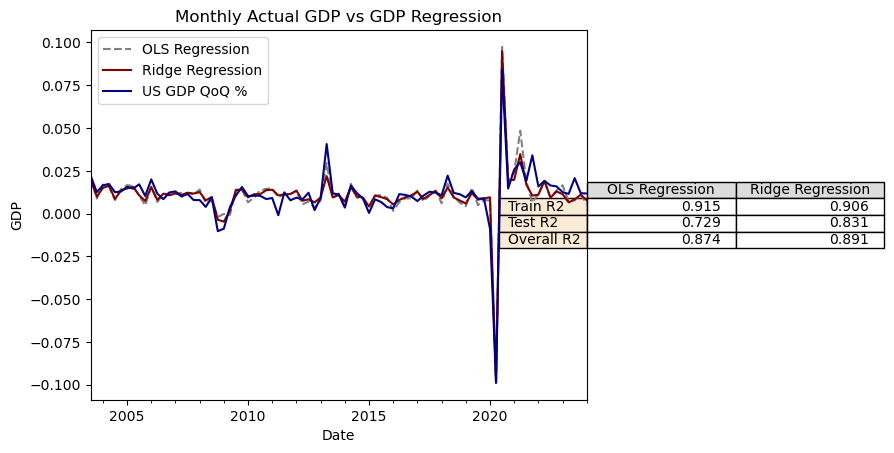

2024-09-30 00:00:00
R2 (training): 0.951
R2 (test): -0.141
OLS Regression R2 0.8716952564097251
training MSE (using sklearn function): 7.951040085328757e-06
Ridge R2 (training): 0.948
Ridge R2 (test): 0.202
Ridge Regression R2 0.8927526457431072


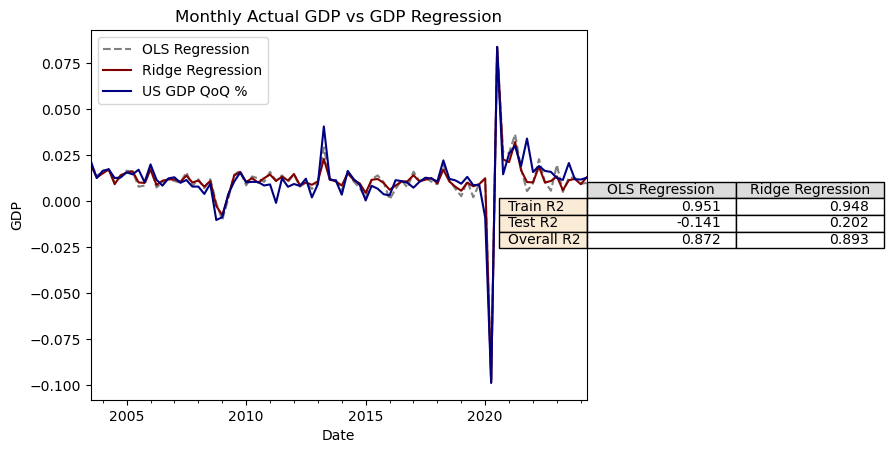

         Date  Motor Vehicle and Parts Dealers QoQ %  \
80 2023-09-30                               0.011223   
81 2023-12-31                               0.004451   
82 2024-03-31                              -0.009297   
83 2024-06-30                               0.009678   
84 2024-09-30                               0.011466   

    Building M and Garden Equip QoQ %  Grocery Stores QoQ %  \
80                          -0.003794              0.004274   
81                          -0.004104              0.006443   
82                          -0.031025             -0.003436   
83                           0.008748              0.008159   
84                           0.021380              0.008351   

    Health and Personal Care QoQ %  Gas Stations QoQ %  \
80                        0.011613            0.005082   
81                        0.036965            0.015250   
82                       -0.036449           -0.035638   
83                       -0.001700            0.0246

In [90]:
def Regression_monthly_gdp(tdate,retailq,constrq,businvq,tradeq,gdp_nom):
    import statsmodels.api as sm
    import statsmodels.formula.api as amf
    from statsmodels.formula.api import glm
    from sklearn.linear_model import Ridge
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.linear_model import Lasso
    from sklearn.linear_model import LassoCV
    from sklearn.preprocessing import StandardScaler, PolynomialFeatures
    import utils
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error

    

#pulling advanced retail sales, construction, inventories and trade data and merging all the files together so we can group it with quarterly GDP change and do some regression
    data_frames=[retailq,constrq,businvq,tradeq]
    df = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='inner'), data_frames)
 
    df.to_csv(r'\\Mac\Home\Downloads\Full Regression_Quarterly Return Data.csv',index=False)

    data=df.copy()
#calculating correlation, as variables used in the regression should be independent of each other. Will keep the most relevant datapoint, and removed the one that's correlated to it
    matrix=df.drop(['Date'],axis=1)
    matrix=matrix.corr()
    matrix.to_csv(r'\\Mac\Home\Downloads\matrix.csv',index=False)
     
    df=df[(df['Date'] <= tdate)]  #this keeps the last date   
    r2list=[]  
#entire list of headers
    full=['Motor Vehicle and Parts Dealers QoQ %','Auto and Other Motor QoQ %','Furniture and Home Stores QoQ %','Elect and Appl Stores QoQ %','Building M and Garden Equip QoQ %','F&B Stores QoQ %','Grocery Stores QoQ %','Health and Personal Care QoQ %','Gas Stations QoQ %','Clothing and Access Stores QoQ %','Sports,Hobby,Music,Books QoQ %','Gen Merchandise Stores QoQ %','Dept Stores QoQ %','Misc Store Retailers QoQ %','Nonstore Retail QoQ %','F&B Places QoQ %','Total Construction QoQ %','Residential QoQ %','Nonresidential QoQ %',	'Business Inventories QoQ %','Balance-Total QoQ %','Balance-Goods QoQ %','Balance-Services QoQ %','Exports-Total QoQ %','Exports-Goods QoQ %','Exports-Services QoQ %','Imports-Total QoQ %','Imports-Goods QoQ %','Imports-Services QoQ %']  


#pulling GDP data
    df2=gdp_nom.copy()
    df2['US GDP QoQ %']=df2['Adv Estimate']/df2['3rd Estimate'].shift(1)-1
    df2=df2[['Date','US GDP QoQ %']]
    df2=df2[(df2['Date'] < tdate)] 

    
    gdp=df.merge(df2,on='Date',how='outer')
    gdp=gdp.sort_values(by='Date')
    gdp.dropna(inplace=True)
    gdp.to_csv(r'\\Mac\Home\Downloads\gdp test.csv',index=False)
    testgdp=gdp[(gdp['Date'] < tdate)].copy() #cut off last date, so that forecasting doesnt take into account foresight
   # print(df2)
#scattor plot to see relationship btw the regressor and GDP chg
#    for h in full:
#        r2=(h+' r2:',(testgdp['US GDP QoQ %'].corr(testgdp[h]))**2)
#        print(r2)
#        ax = plt.gca()
#        testgdp.plot.scatter(x=h,y='US GDP QoQ %',color='maroon',ax=ax)      
#        plt.show()

    
#list of regressors that will be used
    headers=['Motor Vehicle and Parts Dealers QoQ %','Building M and Garden Equip QoQ %','Grocery Stores QoQ %','Health and Personal Care QoQ %','Gas Stations QoQ %','Clothing and Access Stores QoQ %','Gen Merchandise Stores QoQ %','Nonstore Retail QoQ %','Residential QoQ %','Nonresidential QoQ %','Business Inventories QoQ %','Balance-Services QoQ %','Exports-Total QoQ %','Imports-Services QoQ %']  

# list of columns not included in the regressor list   
    remove = [i for i in full if i not in headers] 
    full_headers=headers
    testgdp.drop(remove,axis=1,inplace=True) #removing those headers from our df
    X_R1=testgdp[headers] #keeps it in dataframe form (2D array) vs a 1D array (ie series)       
    y_R1=testgdp[['US GDP QoQ %']]

#splitting data, can be used for all different types of regression
    X_train, X_test, y_train, y_test=train_test_split(X_R1, y_R1,random_state=0)
 
#OLS
    linreg=LinearRegression().fit(X_train,y_train)
  
    print('R2 (training): {:.3f}'.format(linreg.score(X_train,y_train)))
    print('R2 (test): {:.3f}'.format(linreg.score(X_test,y_test)))
    
    #calculating regression results (y=w*x + b)
    testgdp['OLS Regression']= linreg.predict(X_R1)
    r2_OLS=(testgdp['US GDP QoQ %'].corr(testgdp['OLS Regression']))**2
    print('OLS Regression R2',r2_OLS)

    
# Calculating squared errors:
# Feed the scaled training set and get the predictions (MSE = mean squared error)
    yhatreg = linreg.predict(X_train)

# Use scikit-learn's utility function and divide by 2
    print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhatreg) / 2}")

#******improving regression******** 
#scaling does nothing as regressors are in % form, so in a sense are already scaled
#poly is good for underfitting. The ridge regression formula gave low training results, suggesting a bit of underfitting
#I tested degrees from 2-5 and 3 was the optimum

    poly=PolynomialFeatures(degree=3,include_bias=False)    
    X_train_poly=poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_R1_poly=poly.fit_transform(X_R1)
    
#    print('R2 (training): {:.3f}'.format(linregpoly.score(X_train_poly,y_train)))
#    print('R2 (test): {:.3f}'.format(linregpoly.score(X_test_poly,y_test)))  

#ridge regression (L2 penalisation), penalizes large feature weight as large coefficient when squared will result in a larger objective overall value,best used when most variables have a large impact
#ridge regression, I used alpha from 0.005-0.1 and the best result was ~0.0125 
   
    #alpha=np.linspace(0,0.1,20) #this generates a range of numbers btw two values
    linridge=Ridge(alpha=0.015).fit(X_train_poly,y_train)
    print('Ridge R2 (training): {:.3f}'.format(linridge.score(X_train_poly,y_train)))
    print('Ridge R2 (test): {:.3f}'.format(linridge.score(X_test_poly,y_test)))
    #print('Ridge intercept: {}'.format(linridge.intercept_))
    #print('Ridge coeff:\n {}'.format(linridge.coef_))
    
    #calculating regression - y = w*x + b
    testgdp['Ridge Regression']= linridge.predict(X_R1_poly)
    r2_ridge=(testgdp['US GDP QoQ %'].corr(testgdp['Ridge Regression']))**2
    print('Ridge Regression R2',r2_ridge)

    table_rows=['Train R2','Test R2','Overall R2']
    table_val=[['{:.3f}'.format(linreg.score(X_train,y_train)),'{:.3f}'.format(linridge.score(X_train_poly,y_train))],['{:.3f}'.format(linreg.score(X_test,y_test)),'{:.3f}'.format(linridge.score(X_test_poly,y_test))],['{:.3f}'.format(r2_OLS),'{:.3f}'.format(r2_ridge)]]

    ax = plt.gca()
    testgdp.plot(kind='line',x='Date',y='OLS Regression',color='grey',style='--',ax=ax)
    testgdp.plot(kind='line',x='Date',y='Ridge Regression',color='maroon',ax=ax)
    testgdp.plot(kind='line',x='Date',y='US GDP QoQ %',color='navy',ax=ax)
    plt.xlabel('Date')
    plt.ylabel('GDP')
    plt.title('Monthly Actual GDP vs GDP Regression')         


    table=plt.table(cellText=table_val,
                    colWidths=[0.3] * 2,
            
                    rowColours=["antiquewhite"] * 3, 
                    colColours=["gainsboro"]*2,
                    colLabels=('OLS Regression','Ridge Regression'),
                    rowLabels=table_rows,
                    loc='right')
    plt.show()    

#*****predicting the regressed value- using OLS Regression  
    testgdp=testgdp[['Date','OLS Regression','Ridge Regression']].copy()
    
    df.dropna(inplace=True)
    OLS=df[headers].copy()
    date=df[['Date']]
    OLS['Forecast']=linreg.predict(OLS)  #calculates predicted values
    OLS.insert(0,'Date',date)
    OLS['Ann. Nominal GDP F/C']=((1+OLS['Forecast'])**4)-1   
    OLS=OLS.merge(testgdp, on='Date',how='outer') #this is to ensure the regression calculated matches the regression calc above    
    OLS=OLS.sort_values(by='Date') 
   
#pull full GDP data again (the above version cuts off latest data to prevent using foresight in the regression analysis)
    df2=gdp_nom.copy()
    df2['US GDP QoQ %']=df2['Adv Estimate']/df2['3rd Estimate'].shift(1)-1
    df2['Actual Nom GDP Ann Return']=((1+df2['US GDP QoQ %'])**4)-1
    df2=df2[['Date','Actual Nom GDP Ann Return']]
    df2=df2[(df2['Date'] <= tdate)]  
    OLS=OLS.merge(df2, on='Date',how='outer')    
    OLS=OLS.sort_values(by='Date') 
    OLS.drop(['OLS Regression','Ridge Regression','Forecast'],axis=1,inplace=True)
    OLS=OLS[(OLS['Date'] > '2003-09-01')]  


    OLS_read=pd.read_csv(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\GDP Regression Data-Monthly.csv',index_col=False)
    OLS_read['Date']=pd.to_datetime(OLS_read['Date'],format='%Y-%m-%d')

    OLS=pd.concat([OLS_read,OLS])

    OLS=OLS.drop_duplicates(subset='Date', keep="first")
    OLS.to_csv(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\GDP Regression Data-Monthly.csv',index=False) 


#*****predicting the regressed value- using Ridge Regression  
    df.dropna(inplace=True)
    ridge=df[headers].copy()
    ridge_poly=poly.fit_transform(ridge)
    date=df[['Date']]
    ridge['Forecast']=linridge.predict(ridge_poly)
    ridge.insert(0,'Date',date)
    ridge['Ann. Nominal GDP F/C']=((1+ridge['Forecast'])**4)-1   

   
    ridge=ridge.merge(testgdp, on='Date',how='outer') #this is just a double-check to ensure the regression calculated matches the regression calc above    
    ridge=ridge.sort_values(by='Date') 


#pull full GDP data again (the above version cuts off latest data to prevent using foresight in the regression analysis)
  
    ridge=ridge.merge(df2, on='Date',how='outer')  
    ridge.drop(['OLS Regression','Ridge Regression','Forecast'],axis=1,inplace=True)
    ridge=ridge[(ridge['Date'] > '2003-09-01')].sort_values(by='Date')


    
    ridge_read=pd.read_csv(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Ridge GDP Regression Data-Monthly.csv',index_col=False)
    ridge_read['Date']=pd.to_datetime(ridge_read['Date'],format='%Y-%m-%d')

    
    ridge=pd.concat([ridge_read,ridge])
    ridge=ridge.drop_duplicates(subset='Date', keep="first")

    ridge.to_csv(r'\\Mac\Home\Downloads\Ridge GDP Regression Data-Monthly.csv',index=False) 
    ridge.to_csv(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Ridge GDP Regression Data-Monthly.csv',index=False) 

    return OLS, ridge,full_headers,data


#Regression_monthly_gdp('2010-09-30')
start_date = "2024-01-01"
end_date = "2024-10-01"
dates=pd.date_range(start_date, end_date, freq='Q')
for d in dates:
    print(d)
    OLS,ridge,full,data=Regression_monthly_gdp(d,retailq,constrq,businvq,tradeq,gdpdf)
print(ridge.tail(5))


## Permits

Pulling permit information potentially to improve construction figures. Permits issued are allocated over the upcoming 12 mos using a specific formula. This is the figure I used in calculating potential impact to GDP. 

In [37]:
def permits():

    key=Fred(api_key='9f30ed607bc4d65fe1aaaaf501103192')
    info=key.get_series('PERMIT')
    df=pd.DataFrame(data=info)
    df=df.reset_index()
    df.rename(columns={'index':'Date'},inplace=True)
    df.rename(columns={0:'PERMIT'},inplace=True)
    df=df.tail(12)
    df.reset_index(inplace=True,drop=True)

    df['Month']=df['Date'].dt.month #this is to get the row number of the allocation file
    df.reset_index(inplace=True)    #to get a column with index number
    df['Number']=(12-df['index'])   #this is to get the column number for the allocation file
    df['Number'] = df['Number'].apply(pd.to_numeric, errors='coerce') 
    
    print(df['Month'].dtypes)
    df.drop(['index'],axis=1,inplace=True)   
    
    allocdf=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Permits.xlsx',sheet_name='Methodology')
    print(allocdf.tail(10))
    alloc_list=[]
    for x,y in zip(df['Month'],df['Number']):

        alloc=(allocdf.iloc[x-1,y])/100  #to input the row, column number to get the allocation ratio
        alloc_list.append(alloc)

    print(alloc_list)
    df['Allocation']=alloc_list
    df['Distributed']=(df['Allocation']*df['PERMIT']).cumsum()
    df=df[['Date','PERMIT','Distributed']]
    df=df.tail(1)
    print(df.tail(10))
    
    SApermits=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Permits.xlsx',sheet_name='SA Permits')
    SApermits['Date']=pd.to_datetime(SApermits['Date'],format='%Y-%m-%d')

    SApermits=pd.concat([SApermits,df])
    SApermits=SApermits.drop_duplicates(subset='Date', keep="last")
    SApermits.reset_index(inplace=True,drop=True)
    print(SApermits.tail(10))
   
    #census adjust permits annually and that allocations is dependent on the month that the permit was issued
    alloc=[(0,0.1580),(1,0.2170),(2,0.21),(3,0.1630),(4,0.1060),(5,0.061),(6,0.035),(7,0.02),(8,0.012),(9,0.008),(10,0.006),(11,0.004)]
   
        
    NSApermits=pd.read_excel(r'https://www.census.gov/construction/nrc/xls/permits_cust.xls',sheet_name='PermitsUA')
    NSApermits=NSApermits.iloc[6:,1:6]
    NSApermits.rename(columns={'New Privately Owned Housing Units  Authorized by Building Permits in Permit-Issuing Places':'Date'},inplace=True)
    NSApermits.rename(columns={'Unnamed: 2':'Total'},inplace=True)
    NSApermits.rename(columns={'Unnamed: 3':'1 Unit'},inplace=True)
    NSApermits.rename(columns={'Unnamed: 4':'2-4 Units'},inplace=True)
    NSApermits.rename(columns={'Unnamed: 5':'5+ Units'},inplace=True)
    NSApermits.drop(NSApermits.tail(12).index, inplace = True)
    NSApermits.drop([6,7],inplace=True)
    NSApermits.dropna(inplace=True)
    NSApermits.reset_index(inplace=True,drop=True)
    total=0
    for n,a in alloc:
        
        total+=NSApermits['Total'].shift(n)*a
        NSApermits['Distributed Units']=total
 

    writer = pd.ExcelWriter(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Permits.xlsx')
    SApermits.to_excel(writer, sheet_name='SA Permits',index=False)    
    allocdf.to_excel(writer,sheet_name='Methodology',index=False)     
    NSApermits.to_excel(writer, sheet_name='NSA Permits',index=False) 
    writer.close()

#calculating numbers to be used to forecast current GDP

#monthly construction permits is released 3 wks post month end and 2nd revision 4 wks post month end, lagged by x number of months
    permits=SApermits.copy()
#resample into quarters, taking 1st month
    permits=permits.set_index('Date').resample('Q').first() 
    permits.reset_index(inplace=True)

    permits['Permits QoQ %']=permits['Distributed'].pct_change()
    permits=permits[['Date','Permits QoQ %']]
    print(permits.tail(10))    

    return permits
    
permitsdf=permits() 

int32
       Month    1st   2nd   3rd   4th   5th  6th  7th  8th  9th  10th  11th  \
2       March  15.8  22.5  20.8  16.0  10.3  6.1  3.5  2.0  1.2   0.8   0.6   
3       April  15.8  22.5  20.8  16.0  10.3  6.1  3.5  2.0  1.2   0.8   0.6   
4         May  15.9  22.9  20.8  16.0  10.3  6.1  3.5  1.5  1.2   0.8   0.6   
5        June  16.9  23.8  20.8  16.0   9.5  5.8  2.7  1.5  1.2   0.8   0.6   
6        July  16.9  23.8  20.8  16.0   9.5  5.8  2.7  1.5  1.2   0.8   0.6   
7      August  16.9  23.8  20.8  16.0   8.8  5.1  2.7  2.5  1.6   0.8   0.6   
8   September  16.9  23.8  20.8  13.7   8.8  5.1  4.3  2.8  2.0   0.8   0.6   
9     October  16.9  23.8  18.3  13.7   8.8  7.4  4.8  3.3  1.2   0.8   0.6   
10   November  16.9  21.7  18.3  13.7  11.7  7.6  4.3  2.8  1.2   0.8   0.6   
11   December  15.8  21.7  18.3  16.8  11.7  6.7  4.0  2.0  1.2   0.8   0.6   

    12th  
2    0.4  
3    0.4  
4    0.4  
5    0.4  
6    0.4  
7    0.4  
8    0.4  
9    0.4  
10   0.4  
11   0.4  
[0.

## Non Farm Payrolls

Pulling out NFP, with the different revisions and concatenating them to a spreadsheet. This is to potentially improve on predictability of household consumption.

In [39]:
def nfp():

      today=dt.datetime.now()
      now=today+dt.timedelta(days=1) 
      now=now.strftime('%Y-%m-%d') 

      df=blp.bdh(tickers=['NFP T Index'], flds=['last_price'],start_date='2001-01-04',end_date=now)
      df.columns = df.columns.droplevel(-1) #drops one of the column header rows
      df.reset_index(inplace=True)
      df.columns=['Date','NFP',]  
      df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
      df=df.set_index('Date').resample('m').last()  #resample so we get the same monthly dates
      df.reset_index(inplace=True)
      df=df.tail(3)
      df.reset_index(inplace=True,drop=True)
      print(df.tail(10))


      nfp=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\NFP.xlsx',sheet_name='nfp')
      nfp['Date']=pd.to_datetime(nfp['Date'],format='%Y-%m-%d')
      nfp=nfp.set_index('Date').resample('m').last() 
      nfp.reset_index(inplace=True)
      print(nfp.tail(10))

      unrev=nfp[['Date','Unrev']].copy()
      unrev.dropna(inplace=True)
      df_unrev=df.copy()
      df_unrev.rename(columns={'NFP':'Unrev'},inplace=True)
      unrev=pd.concat([unrev,df_unrev.iloc[2:3,:]])
      unrev=unrev.drop_duplicates(subset='Date', keep="first")
#getting quarterly numbers
      unrevq=unrev.copy()
      unrevq['qtr_year'] = pd.to_datetime(unrevq['Date']).dt.to_period('Q')
      unrevq=unrevq.groupby(['qtr_year']).head(2)     
      unrevq=unrevq.set_index('Date').resample('Q').last() 
      unrevq.drop('qtr_year',axis=1,inplace=True)

      rev1=nfp[['Date','Rev 1']].copy()
      rev1.dropna(inplace=True)
      df_rev1=df.copy()
      df_rev1.rename(columns={'NFP':'Rev 1'},inplace=True)
      rev1=pd.concat([rev1,df_rev1.iloc[1:2,:]])
      rev1=rev1.drop_duplicates(subset='Date', keep="first")
#getting quarterly numbers
      rev1q=rev1.copy()
      rev1q['qtr_year'] = pd.to_datetime(rev1q['Date']).dt.to_period('Q')
      rev1q=rev1q.groupby(['qtr_year']).head(2)     
      rev1q=rev1q.set_index('Date').resample('Q').first() 
      rev1q.drop('qtr_year',axis=1,inplace=True)

      rev2=nfp[['Date','Rev 2']].copy()
      rev2.dropna(inplace=True)
      df_rev2=df.copy()
      df_rev2.rename(columns={'NFP':'Rev 2'},inplace=True)
      rev2=pd.concat([rev2,df_rev2.iloc[0:1,:]])
      rev2=rev2.drop_duplicates(subset='Date', keep="first")
#getting quarterly numbers
      rev2q=rev2.copy()
      rev2q['qtr_year'] = pd.to_datetime(rev2q['Date']).dt.to_period('Q')
      rev2q=rev2q.groupby(['qtr_year']).head(2)     
      rev2q=rev2q.set_index('Date').resample('Q').sum(numeric_only=True) 

      
      nfp=pd.merge(pd.merge(unrev,rev1,on='Date',how='outer'),rev2,on='Date',how='outer')
      nfp=nfp.sort_values(by='Date')
      nfp.reset_index(inplace=True,drop=True)
      print(nfp.tail(10))

      writer = pd.ExcelWriter(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\NFP.xlsx')
      nfp.to_excel(writer, sheet_name='nfp',index=False)  
      writer.close()

#calculating the data to be used to forecast the current quarter's GDP
#NFP - released 1 wk after month end, we can use 2 mos of data
      nfpq=pd.merge(pd.merge(unrevq,rev1q,on='Date',how='outer'),rev2q,on='Date',how='outer')
      nfpq=nfpq.sort_values(by='Date')
      nfpq.reset_index(inplace=True,)

      nfpq['NFP QoQ %']=(nfpq['Unrev']+nfpq['Rev 1'])/nfpq['Rev 2'].shift(1)-1
      nfpq=nfpq[['Date','NFP QoQ %']]
      print(nfpq.tail(10))
      return nfpq
    
nfpdf=nfp()

        Date       NFP
0 2024-06-30  158548.0
1 2024-07-31  158637.0
2 2024-08-31  158779.0
          Date   Unrev     Rev 1     Rev 2
286 2023-11-30  157087  157016.0  157014.0
287 2023-12-31  157232  157347.0  157304.0
288 2024-01-31  157700  157533.0  157560.0
289 2024-02-29  157808  157830.0  157796.0
290 2024-03-31  158133  158111.0  158106.0
291 2024-04-30  158286  158271.0  158214.0
292 2024-05-31  158543  158432.0  158430.0
293 2024-06-30  158638  158609.0  158548.0
294 2024-07-31  158723  158637.0       NaN
295 2024-08-31  158779       NaN       NaN
          Date     Unrev     Rev 1     Rev 2
286 2023-11-30  157087.0  157016.0  157014.0
287 2023-12-31  157232.0  157347.0  157304.0
288 2024-01-31  157700.0  157533.0  157560.0
289 2024-02-29  157808.0  157830.0  157796.0
290 2024-03-31  158133.0  158111.0  158106.0
291 2024-04-30  158286.0  158271.0  158214.0
292 2024-05-31  158543.0  158432.0  158430.0
293 2024-06-30  158638.0  158609.0  158548.0
294 2024-07-31  158723.0  1586

## Job openings 

This is similar to NFPs. 

In [41]:
def jolts():

      today=dt.datetime.now()
      now=today+dt.timedelta(days=1) 
      now=now.strftime('%Y-%m-%d') 

      df=blp.bdh(tickers=['JOLTTOTL Index'], flds=['last_price'],start_date='2001-01-04',end_date=now)
      df.columns = df.columns.droplevel(-1) #drops one of the column header rows
      df.reset_index(inplace=True)
      df.columns=['Date','JOLTS',]  
      df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
      df=df.set_index('Date').resample('m').last()  #resample so we get the same monthly dates
      df.reset_index(inplace=True)
      df=df.tail(12)
      df.reset_index(inplace=True,drop=True)
      print(df)


      jolts=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\JOLTS Master.xlsx',sheet_name='Jolts')
      jolts['Date']=pd.to_datetime(jolts['Date'],format='%Y-%m-%d')
      jolts=jolts.set_index('Date').resample('m').last() 
      jolts.reset_index(inplace=True)
      print(jolts.tail(10))

      unrev=jolts[['Date','Unrev']].copy()
      unrev.dropna(inplace=True)
      df_unrev=df.copy()
      df_unrev.rename(columns={'JOLTS':'Unrev'},inplace=True)
      unrev=pd.concat([unrev,df_unrev.iloc[11:12,:]])
      unrev=unrev.drop_duplicates(subset='Date', keep="first")


      rev1=jolts[['Date','Rev 1']].copy()
      rev1.dropna(inplace=True)
      df_rev1=df.copy()
      df_rev1.rename(columns={'JOLTS':'Rev 1'},inplace=True)
      rev1=pd.concat([rev1,df_rev1.iloc[10:11,:]])
      rev1=rev1.drop_duplicates(subset='Date', keep="first")


      rev3=jolts[['Date','Rev 3']].copy()
      rev3.dropna(inplace=True)
      df_rev3=df.copy()
      df_rev3.rename(columns={'JOLTS':'Rev 3'},inplace=True)
      rev3=pd.concat([rev3,df_rev3.iloc[0:9,:]])
      rev3=rev3.drop_duplicates(subset='Date', keep="first")

      
      jolts=pd.merge(pd.merge(unrev,rev1,on='Date',how='outer'),rev3,on='Date',how='outer')
      jolts=jolts.sort_values(by='Date')
      jolts.reset_index(inplace=True,drop=True)
      print(jolts.tail(10))

      writer = pd.ExcelWriter(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\JOLTS master.xlsx')
      jolts.to_excel(writer, sheet_name='Jolts',index=False)  
      writer.close()

#Calculating to be used to forecast current quarter's GDP
#jolts -released 4-5 weeks post month end. Only 1 month of data can be used
    
      joltsq=jolts.copy()
      joltsq=joltsq.set_index('Date').resample('Q').first()    
      joltsq.reset_index(inplace=True)
      joltsq['Job Openings QoQ %']=joltsq['Unrev']/joltsq['Rev 1'].shift(1)-1 
      joltsq=joltsq[['Date','Job Openings QoQ %']]
      print(joltsq.tail(10))

      return joltsq
    
joltsdf=jolts()

         Date   JOLTS
0  2023-08-31  9358.0
1  2023-09-30  9307.0
2  2023-10-31  8685.0
3  2023-11-30  8931.0
4  2023-12-31  8889.0
5  2024-01-31  8748.0
6  2024-02-29  8813.0
7  2024-03-31  8355.0
8  2024-04-30  7919.0
9  2024-05-31  8230.0
10 2024-06-30  7910.0
11 2024-07-31  7673.0
          Date   Unrev   Rev 1   Rev 3
239 2023-10-31  8733.0  8852.0  8685.0
240 2023-11-30  8790.0  8925.0  8931.0
241 2023-12-31  9026.0  8889.0  8889.0
242 2024-01-31  8863.0  8748.0  8748.0
243 2024-02-29  8756.0  8813.0  8813.0
244 2024-03-31  8488.0  8355.0  8355.0
245 2024-04-30  8059.0  7919.0  7919.0
246 2024-05-31  8140.0  8230.0     NaN
247 2024-06-30  8184.0  7910.0     NaN
248 2024-07-31  7673.0     NaN     NaN
          Date   Unrev   Rev 1   Rev 3
239 2023-10-31  8733.0  8852.0  8685.0
240 2023-11-30  8790.0  8925.0  8931.0
241 2023-12-31  9026.0  8889.0  8889.0
242 2024-01-31  8863.0  8748.0  8748.0
243 2024-02-29  8756.0  8813.0  8813.0
244 2024-03-31  8488.0  8355.0  8355.0
245 2024-04-

## CPI for Healthcare and Shelter expenses

Healthcare and shelter costs (owner's equiv) is the largest service expense and movement in CPI is indicative of expenditure in these two areas. Pulling out the different revisions and concatenating to a spreadsheet. 

In [43]:
def cpi():

      today=dt.datetime.now()
      now=today+dt.timedelta(days=1) 
      now=now.strftime('%Y-%m-%d') 

      df=blp.bdh(tickers=['CPRHSHLT Index','CPRMSERV Index'], flds=['last_price'],start_date='2001-01-04',end_date=now)
      df.columns = df.columns.droplevel(-1) #drops one of the column header rows
      df.reset_index(inplace=True)
      df.columns=['Date','Shelter','Healthcare']  
      df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
      df=df.set_index('Date').resample('m').last()  #resample so we get the same monthly dates
      df.reset_index(inplace=True)
      df=df.tail(2)
      df.reset_index(inplace=True,drop=True)
      print(df)


      house=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\US CPI NSA.xlsx',sheet_name='Shelter')
      house['Date']=pd.to_datetime(house['Date'],format='%Y-%m-%d')
      house=house.set_index('Date').resample('m').last() 
      house.reset_index(inplace=True)
      print(house.tail(10))

      unrev_house=house[['Date','Unrev']].copy()
      unrev_house.dropna(inplace=True)
      df_unrev=df[['Date','Shelter']].copy()
      df_unrev.rename(columns={'Shelter':'Unrev'},inplace=True)
      unrev_house=pd.concat([unrev_house,df_unrev.iloc[1:2,:]])
      unrev_house=unrev_house.drop_duplicates(subset='Date', keep="first")
#getting quarterly numbers
      unrev_houseq=unrev_house.copy()
      unrev_houseq['qtr_year'] = pd.to_datetime(unrev_houseq['Date']).dt.to_period('Q')
      unrev_houseq=unrev_houseq.groupby(['qtr_year']).head(2)     
      unrev_houseq=unrev_houseq.set_index('Date').resample('Q').last() 
      unrev_houseq.drop('qtr_year',axis=1,inplace=True)

      rev1_house=house[['Date','1st Rev']].copy()
      rev1_house.dropna(inplace=True)
      df_rev1=df[['Date','Shelter']].copy()
      df_rev1.rename(columns={'Shelter':'1st Rev'},inplace=True)
      rev1_house=pd.concat([rev1_house,df_rev1.iloc[0:1,:]])
      rev1_house=rev1_house.drop_duplicates(subset='Date', keep="first")
#getting quarterly numbers
      rev1_houseq=rev1_house.copy()
      rev1_houseq['qtr_year'] = pd.to_datetime(rev1_houseq['Date']).dt.to_period('Q')
      rev1_houseq=rev1_houseq.groupby(['qtr_year']).head(2)  
      rev2_houseq=rev1_houseq.copy()
      rev1_houseq=rev1_houseq.set_index('Date').resample('Q').first() 
      rev1_houseq.drop('qtr_year',axis=1,inplace=True)

#separately, getting a combined number for comparison
      rev2_houseq.rename(columns={'1st Rev':'1st Rev Sum'},inplace=True)
      rev2_houseq=rev2_houseq.set_index('Date').resample('Q').sum(numeric_only=True)  

      house=unrev_house.merge(rev1_house,on='Date',how='outer')
      house=house.sort_values(by='Date')
      house.reset_index(inplace=True,drop=True)
      print(house.tail(10))


      health=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\US CPI NSA.xlsx',sheet_name='HealthCare')
      health['Date']=pd.to_datetime(health['Date'],format='%Y-%m-%d')
      health=health.set_index('Date').resample('m').last() 
      health.reset_index(inplace=True)
      print(health.tail(10))

      unrev_health=health[['Date','Unrev']].copy()
      unrev_health.dropna(inplace=True)
      df_unrev=df[['Date','Healthcare']].copy()
      df_unrev.rename(columns={'Healthcare':'Unrev'},inplace=True)
      unrev_health=pd.concat([unrev_health,df_unrev.iloc[1:2,:]])
      unrev_health=unrev_health.drop_duplicates(subset='Date', keep="first")
#getting quarterly numbers
      unrev_healthq=unrev_health.copy()
      unrev_healthq['qtr_year'] = pd.to_datetime(unrev_healthq['Date']).dt.to_period('Q')
      unrev_healthq=unrev_healthq.groupby(['qtr_year']).head(2)     
      unrev_healthq=unrev_healthq.set_index('Date').resample('Q').last() 
      unrev_healthq.drop('qtr_year',axis=1,inplace=True)

      rev1_health=health[['Date','1st Rev']].copy()
      rev1_health.dropna(inplace=True)
      df_rev1=df[['Date','Healthcare']].copy()
      df_rev1.rename(columns={'Healthcare':'1st Rev'},inplace=True)
      rev1_health=pd.concat([rev1_health,df_rev1.iloc[0:1,:]])
      rev1_health=rev1_health.drop_duplicates(subset='Date', keep="first")
#getting quarterly numbers
      rev1_healthq=rev1_health.copy()
      rev1_healthq['qtr_year'] = pd.to_datetime(rev1_healthq['Date']).dt.to_period('Q')
      rev1_healthq=rev1_healthq.groupby(['qtr_year']).head(2)  
      rev2_healthq=rev1_healthq.copy()
      rev1_healthq=rev1_healthq.set_index('Date').resample('Q').first() 
      rev1_healthq.drop('qtr_year',axis=1,inplace=True)

#separately, getting a combined number for comparison
      rev2_healthq.rename(columns={'1st Rev':'1st Rev Sum'},inplace=True)
      rev2_healthq=rev2_healthq.set_index('Date').resample('Q').sum(numeric_only=True)    

      health=unrev_health.merge(rev1_health,on='Date',how='outer')
      health=health.sort_values(by='Date')
      health.reset_index(inplace=True,drop=True)
      print(health.tail(10))
    

      writer = pd.ExcelWriter(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\US CPI NSA.xlsx')
      house.to_excel(writer, sheet_name='Shelter',index=False)  
      health.to_excel(writer, sheet_name='HealthCare',index=False)
      writer.close()

#calculating numbers to be used to help f/c current qtr's GDP
#CPI numbers are released 2 wks post mon end, so we can use 2 mos worth of data 

      houseq=pd.merge(pd.merge(unrev_houseq,rev1_houseq,on='Date',how='outer'),rev2_houseq,on='Date',how='outer')
      houseq=houseq.sort_values(by='Date')
      houseq.reset_index(inplace=True,)
      houseq['Housing Cost QoQ %']=(houseq['Unrev']+houseq['1st Rev'])/houseq['1st Rev Sum'].shift(1)-1
      houseq=houseq[['Date','Housing Cost QoQ %']]
      print(houseq.tail(10))

      healthq=pd.merge(pd.merge(unrev_healthq,rev1_healthq,on='Date',how='outer'),rev2_healthq,on='Date',how='outer')
      healthq=healthq.sort_values(by='Date')
      healthq.reset_index(inplace=True)
      healthq['Healthcare Costs QoQ %']=(healthq['Unrev']+healthq['1st Rev'])/healthq['1st Rev Sum'].shift(1)-1
      healthq=healthq[['Date','Healthcare Costs QoQ %']]
      print(healthq.tail(10))
      
      return houseq,healthq
    
houseq,healthq=cpi()

        Date  Shelter  Healthcare
0 2024-07-31  401.545     611.137
1 2024-08-31  403.257     611.935
          Date    Unrev  1st Rev
257 2023-11-30  387.892  387.892
258 2023-12-31  389.433  389.433
259 2024-01-31  391.896  391.896
260 2024-02-29  393.906  393.906
261 2024-03-31  396.174  396.174
262 2024-04-30  397.539  397.539
263 2024-05-31  399.274  399.274
264 2024-06-30  400.234  400.234
265 2024-07-31  401.545  401.545
266 2024-08-31  403.257      NaN
          Date    Unrev  1st Rev
257 2023-11-30  387.892  387.892
258 2023-12-31  389.433  389.433
259 2024-01-31  391.896  391.896
260 2024-02-29  393.906  393.906
261 2024-03-31  396.174  396.174
262 2024-04-30  397.539  397.539
263 2024-05-31  399.274  399.274
264 2024-06-30  400.234  400.234
265 2024-07-31  401.545  401.545
266 2024-08-31  403.257      NaN
          Date    Unrev  1st Rev
257 2023-11-30  597.016  597.016
258 2023-12-31  599.464  599.464
259 2024-01-31  605.257  605.257
260 2024-02-29  605.162  605.162
261 202

## Industrial Production

This could potentially help improve data on investments part of CIGX. This is pulling data based on revision and concatenating it to a spreadsheet. 


In [45]:
def ip():

      today=dt.datetime.now()
      now=today+dt.timedelta(days=1) 
      now=now.strftime('%Y-%m-%d') 

      df=blp.bdh(tickers=['IP Index'], flds=['last_price'],start_date='2001-01-04',end_date=now)
      df.columns = df.columns.droplevel(-1) #drops one of the column header rows
      df.reset_index(inplace=True)
      df.columns=['Date','IP',]  
      df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%d")
      df=df.set_index('Date').resample('m').last()  #resample so we get the same monthly dates
      df.reset_index(inplace=True)
      df=df.tail(5)
      df.reset_index(inplace=True,drop=True)
      print(df.tail(10))


      ip=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\US IP.xlsx',sheet_name='IP')
      ip['Date']=pd.to_datetime(ip['Date'],format='%Y-%m-%d')
      ip=ip.set_index('Date').resample('m').last() 
      ip.reset_index(inplace=True)
      print(ip.tail(10))
    
      unrev=ip[['Date','Unrev']].copy()
      unrev.dropna(inplace=True)
      df_unrev=df.copy()
      df_unrev.rename(columns={'IP':'Unrev'},inplace=True)
      unrev=pd.concat([unrev,df_unrev.iloc[4:5,:]])
      unrev=unrev.drop_duplicates(subset='Date', keep="first")
#getting quarterly data      
      unrevq=unrev.copy()
      unrevq['qtr_year'] = pd.to_datetime(unrevq['Date']).dt.to_period('Q')
      unrevq=unrevq.groupby(['qtr_year']).head(2)    
      unrevq=unrevq.set_index('Date').resample('Q').last()
      unrevq.drop('qtr_year',axis=1,inplace=True)

      rev1=ip[['Date','Rev 1']].copy()
      rev1.dropna(inplace=True)
      df_rev1=df.copy()
      df_rev1.rename(columns={'IP':'Rev 1'},inplace=True)
      rev1=pd.concat([rev1,df_rev1.iloc[3:4,:]])
      rev1=rev1.drop_duplicates(subset='Date', keep="first")
#getting quarterly data      
      rev1q=rev1.copy()
      rev1q['qtr_year'] = pd.to_datetime(rev1q['Date']).dt.to_period('Q')
      rev1q=rev1q.groupby(['qtr_year']).head(2)    
      rev1q=rev1q.set_index('Date').resample('Q').first()
      rev1q.drop('qtr_year',axis=1,inplace=True)

    
      rev2=ip[['Date','Rev 2']].copy()
      rev2.dropna(inplace=True)
      df_rev2=df.copy()
      df_rev2.rename(columns={'IP':'Rev 2'},inplace=True)
      rev2=pd.concat([rev2,df_rev2.iloc[2:3,:]])
      rev2=rev2.drop_duplicates(subset='Date', keep="first")

      rev3=ip[['Date','Rev 3']].copy()
      rev3.dropna(inplace=True)
      df_rev3=df.copy()
      df_rev3.rename(columns={'IP':'Rev 3'},inplace=True)
      rev3=pd.concat([rev3,df_rev3.iloc[1:2,:]])
      rev3=rev3.drop_duplicates(subset='Date', keep="first")
#getting quarterly data
      rev3q=rev3.copy()  
      rev3q['qtr_year'] = pd.to_datetime(rev3q['Date']).dt.to_period('Q')
      rev3q=rev3q.groupby(['qtr_year']).head(2)    
      rev3q=rev3q.set_index('Date').resample('Q').last()
      rev3q.drop('qtr_year',axis=1,inplace=True)


      rev4=ip[['Date','Rev 4']].copy()
      rev4.dropna(inplace=True)
      df_rev4=df.copy()
      df_rev4.rename(columns={'IP':'Rev 4'},inplace=True)
      rev4=pd.concat([rev4,df_rev4.iloc[0:1,:]])
      rev4=rev4.drop_duplicates(subset='Date', keep="first")
#getting quarterly data     
      rev4q=rev4.copy()
      rev4q['qtr_year'] = pd.to_datetime(rev4q['Date']).dt.to_period('Q')
      rev4q=rev4q.groupby(['qtr_year']).head(2)    
      rev4q=rev4q.set_index('Date').resample('Q').first()
      rev4q.drop('qtr_year',axis=1,inplace=True)

      
      df_list=[unrev,rev1,rev2,rev3,rev4]
      ip= reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), df_list)
      ip=ip.sort_values(by='Date')
      ip.reset_index(inplace=True,drop=True)
  
      writer = pd.ExcelWriter(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\US IP.xlsx')
      ip.to_excel(writer, sheet_name='IP',index=False)  
      writer.close()
      print(ip.tail(10))

#preparing info to be used to help extrapolate GDP
#IP are released 2 wks post month end, 2 months of data can be used to help calculate current mos GDP
      df_list=[unrevq,rev1q,rev3q,rev4q]
      ipq= reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), df_list)
      ipq=ipq.sort_values(by='Date')
      ipq.reset_index(inplace=True)
      ipq.to_csv(r'\\Mac\Home\Downloads\ip test.csv',index=False)


      ipq['IP QoQ %']=((ipq['Unrev']+ipq['Rev 1'])/2)/((ipq['Rev 3'].shift(1)+ipq['Rev 4'].shift(1))/2)-1
      ipq=ipq[['Date','IP QoQ %']]
      print(ipq.tail(10))
      return ipq
    
ipdf=ip()

        Date        IP
0 2024-04-30  102.4479
1 2024-05-31  103.2156
2 2024-06-30  103.2798
3 2024-07-31  102.3058
4 2024-08-31  103.1389
          Date     Unrev     Rev 1     Rev 2     Rev 3     Rev 4
286 2023-11-30  102.6651  102.4301  102.6710  102.9955  102.9382
287 2023-12-31  102.4840  102.6715  102.6920  102.6149  102.5743
288 2024-01-31  102.5739  102.2251  101.8110  101.7987  101.7240
289 2024-02-29  102.3313  102.2599  102.6317  102.5863  102.6045
290 2024-03-31  102.6577  102.7562  102.4458  102.4062  102.5001
291 2024-04-30  102.7623  102.4547  102.4329  102.4955  102.4479
292 2024-05-31  103.3284  103.3282  103.2734  103.2156       NaN
293 2024-06-30  103.9941  103.5494  103.2798       NaN       NaN
294 2024-07-31  102.8887  102.3058       NaN       NaN       NaN
295 2024-08-31  103.1389       NaN       NaN       NaN       NaN
          Date     Unrev     Rev 1     Rev 2     Rev 3     Rev 4
286 2023-11-30  102.6651  102.4301  102.6710  102.9955  102.9382
287 2023-12-31  1

## Regression Analysis that includes the ancillary information above. 

Like before we use OLS to regress, and then use Ridge and Polynomials to improve the regression. Not all the data pulled earlier is used in this regression

2024-03-31 00:00:00
R2 (training): 0.934
R2 (test): -0.050
OLS Regression R2 0.8939786053142678
training MSE (using sklearn function): 1.1848479217781447e-05
Ridge R2 (training): 0.934
Ridge R2 (test): 0.030
Ridge Regression R2 0.896923190864195


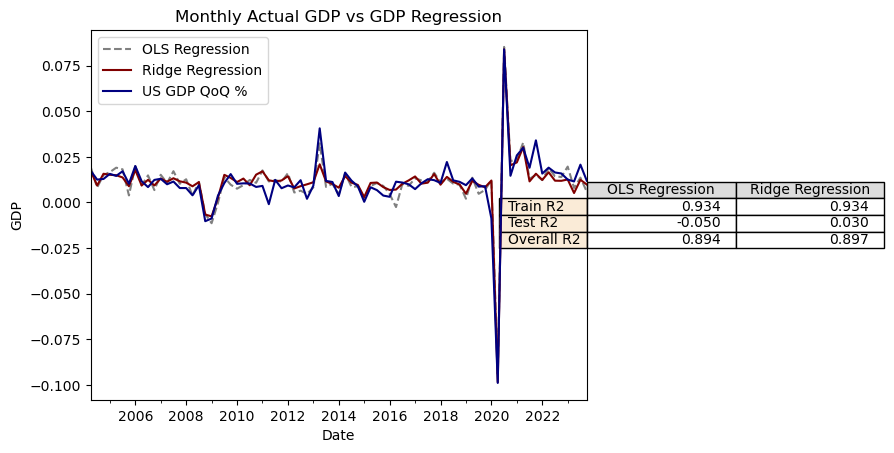

2024-06-30 00:00:00
R2 (training): 0.938
R2 (test): 0.116
OLS Regression R2 0.8962758661180492
training MSE (using sklearn function): 1.0673877775177557e-05
Ridge R2 (training): 0.934
Ridge R2 (test): 0.267
Ridge Regression R2 0.8983512568929073


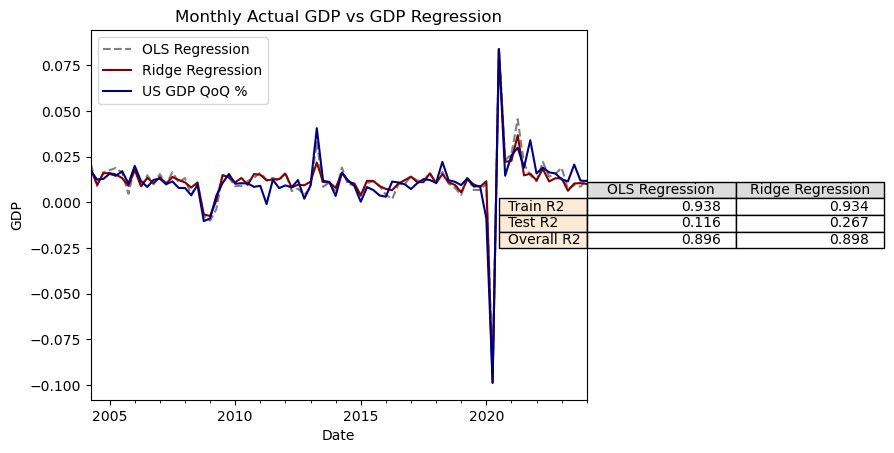

2024-09-30 00:00:00
R2 (training): 0.921
R2 (test): -1.613
OLS Regression R2 0.8991704466223819
training MSE (using sklearn function): 1.4392243850573525e-05
Ridge R2 (training): 0.915
Ridge R2 (test): -0.500
Ridge Regression R2 0.9024975087031961


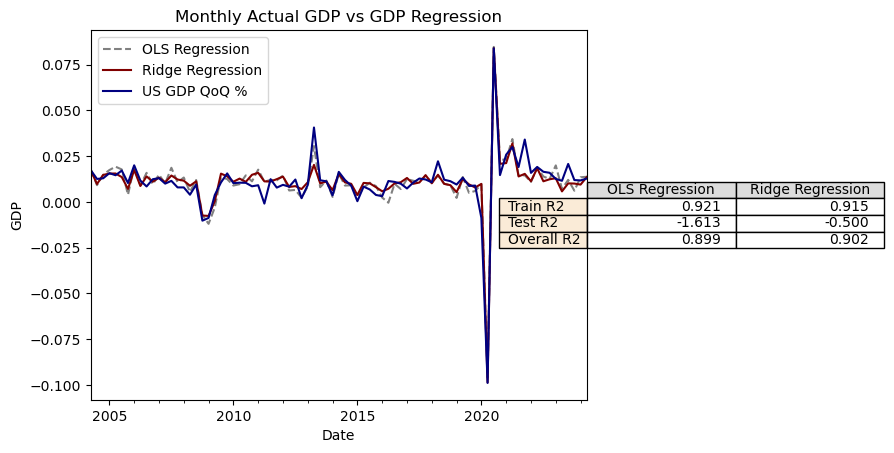

         Date  Motor Vehicle and Parts Dealers QoQ %  \
80 2023-09-30                               0.011223   
81 2023-12-31                               0.004451   
82 2024-03-31                              -0.009297   
83 2024-06-30                               0.009678   
84 2024-09-30                               0.011466   

    Building M and Garden Equip QoQ %  Grocery Stores QoQ %  \
80                          -0.003794              0.004274   
81                          -0.004104              0.006443   
82                          -0.031025             -0.003436   
83                           0.008748              0.008159   
84                           0.021380              0.008351   

    Health and Personal Care QoQ %  Gas Stations QoQ %  \
80                        0.011613            0.005082   
81                        0.036965            0.015250   
82                       -0.036449           -0.035638   
83                       -0.001700            0.0246

In [88]:
def regression_combined_gdp(tdate,data,full,nom,permits,ip,jolts,nfp,house,health):

#pulling GDP data and merging it permits, cpi, ip, nfp and jolts data previously calculated
    df2=nom.copy()
    df2['US GDP QoQ %']=df2['Adv Estimate']/df2['3rd Estimate'].shift(1)-1
    df2=df2[['Date','US GDP QoQ %']]

    df_list=[df2, permits,ip,jolts,nfp,house,health]
    df2= reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), df_list)

    df2=df2.sort_values(by='Date')
    df2.reset_index(inplace=True,drop='True')

#include all the extra datapoints
    factors=['Date','Permits QoQ %','IP QoQ %','Job Openings QoQ %','NFP QoQ %','Housing Cost QoQ %','Healthcare Costs QoQ %']
    factors=['Job Openings QoQ %','IP QoQ %', 'Housing Cost QoQ %',]

# pulling regressors from monthly regression analysis and adding new regressors
    all=full+factors

#merging all the datapoints gathered in the 1st regression as well as the new additional info ie cpi, ip etc.
    monthly=data
    df2=df2.merge(monthly,on='Date',how='outer')
    df2=df2[(df2['Date'] >= '2003-03-31')]
    df2=df2.sort_values(by='Date') 
    
    #calculate correlation btw regressors
    copy=df2.copy()
    copy.drop(['Date'],axis=1,inplace=True)
    
    matrix=copy.corr()
    matrix.to_csv(r'\\Mac\Home\Downloads\matrix.csv',index=False)

    df2=df2[(df2['Date'] <= tdate)] #to keep the current quarter  
    testgdp=df2[(df2['Date'] < tdate)].copy() #to remove the current quarter in order to do regression for that quarter
    df2.drop('US GDP QoQ %', axis=1,inplace=True)

    #all column headers:
    
#list of regressors that will be used
    headers=all

    testgdp.dropna(inplace=True)

    X_R1=testgdp[headers] #keeps it in dataframe form (2D array) vs a 1D array (ie series)       
    y_R1=testgdp[['US GDP QoQ %']]


#splitting data, can be used for all different types of regression
    X_train, X_test, y_train, y_test=train_test_split(X_R1, y_R1,random_state=0)
   
#OLS
    linreg=LinearRegression().fit(X_train,y_train)
  
    print('R2 (training): {:.3f}'.format(linreg.score(X_train,y_train)))
    print('R2 (test): {:.3f}'.format(linreg.score(X_test,y_test)))
    
#calculating regression results (y=w*x + b)
    testgdp['OLS Regression']= linreg.predict(X_R1)
    r2_OLS=(testgdp['US GDP QoQ %'].corr(testgdp['OLS Regression']))**2
    print('OLS Regression R2',r2_OLS)

    
# Calculating squared errors:
# Feed the scaled training set and get the predictions (MSE = mean squared error)
    yhatreg = linreg.predict(X_train)

# Use scikit-learn's utility function and divide by 2
    print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhatreg) / 2}")

#******improving regression******** 
    poly=PolynomialFeatures(degree=3,include_bias=False)    
    X_train_poly=poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_R1_poly=poly.fit_transform(X_R1)
  
    #alpha=np.linspace(0,0.1,20) #this generates a range of numbers btw two values
    linridge=Ridge(alpha=0.015).fit(X_train_poly,y_train)
    print('Ridge R2 (training): {:.3f}'.format(linridge.score(X_train_poly,y_train)))
    print('Ridge R2 (test): {:.3f}'.format(linridge.score(X_test_poly,y_test)))


#calculating regression 
    testgdp['Ridge Regression']= linridge.predict(X_R1_poly)
    r2_ridge=(testgdp['US GDP QoQ %'].corr(testgdp['Ridge Regression']))**2
    print('Ridge Regression R2',r2_ridge)


    table_rows=['Train R2','Test R2','Overall R2']
    table_val=[['{:.3f}'.format(linreg.score(X_train,y_train)),'{:.3f}'.format(linridge.score(X_train_poly,y_train))],['{:.3f}'.format(linreg.score(X_test,y_test)),'{:.3f}'.format(linridge.score(X_test_poly,y_test))],['{:.3f}'.format(r2_OLS),'{:.3f}'.format(r2_ridge)]]

    ax = plt.gca()
    testgdp.plot(kind='line',x='Date',y='OLS Regression',color='grey',style='--',ax=ax)
    testgdp.plot(kind='line',x='Date',y='Ridge Regression',color='maroon',ax=ax)
    testgdp.plot(kind='line',x='Date',y='US GDP QoQ %',color='navy',ax=ax)
    plt.xlabel('Date')
    plt.ylabel('GDP')
    plt.title('Monthly Actual GDP vs GDP Regression')         


    table=plt.table(cellText=table_val,
                    colWidths=[0.3] * 2,            
                    rowColours=["antiquewhite"] * 3, 
                    colColours=["gainsboro"]*2,
                    colLabels=('OLS Regression','Ridge Regression'),
                    rowLabels=table_rows,
                    loc='right')
    plt.show()   
    
#*****predicting the regressed value- using OLS Regression  
    testgdp=testgdp[['Date','OLS Regression','Ridge Regression']]
    OLS=df2[headers].copy()
    OLS.dropna(inplace=True)
    date=df2[['Date']]
    
    OLS['Forecast']=linreg.predict(OLS)
    OLS.insert(0,'Date',date)
    OLS['Ann. Nominal GDP F/C']=((1+OLS['Forecast'])**4)-1   
    OLS=OLS.merge(testgdp, on='Date',how='outer') #this is to ensure the regression calculated matches the regression calc above    
    OLS=OLS.sort_values(by='Date') 

    
#pull full GDP data again (the above version cuts off latest data to prevent using foresight in the regression analysis)
    gdp=nom.copy()
    gdp['US GDP QoQ %']=gdp['Adv Estimate']/gdp['3rd Estimate'].shift(1)-1
    gdp['Actual Nom GDP Ann Return']=((1+gdp['US GDP QoQ %'])**4)-1
    gdp=gdp[(gdp['Date'] <= tdate)]  
    gdp=gdp[['Date','Actual Nom GDP Ann Return']]
  

    OLS=OLS.merge(gdp, on='Date',how='outer')    
    OLS=OLS.sort_values(by='Date') 
    OLS.drop(['OLS Regression','Ridge Regression','Forecast'],axis=1,inplace=True)
    OLS=OLS[(OLS['Date'] > '2003-09-01')]     
    
    OLS_read=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\GDP Regression Data-Combo.xlsx',sheet_name='GDP Regression')
    OLS_read['Date']=pd.to_datetime(OLS_read['Date'],format='%Y-%m-%d')
    OLS=pd.concat([OLS_read,OLS])
    OLS=OLS.drop_duplicates(subset='Date', keep="first")
    
    writer = pd.ExcelWriter(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\GDP Regression Data-Combo.xlsx')
    OLS.to_excel(writer, sheet_name='GDP Regression',index=False)  
    writer.close()
    OLS.to_csv(r'\\Mac\Home\Downloads\GDP Regression Data-Combo.csv',index=False) 

    
#*****predicting the regressed value- using Ridge Regression  
    ridge=df2[headers].copy()
    ridge.dropna(inplace=True)
    ridge_poly=poly.fit_transform(ridge)
    date=df2[['Date']]

    ridge['Forecast']=linridge.predict(ridge_poly)
    ridge.insert(0,'Date',date)
 
    ridge['Ann. Nominal GDP F/C']=((1+ridge['Forecast'])**4)-1   
    ridge=ridge.merge(testgdp, on='Date',how='outer') #this is to ensure the regression calculated matches the regression calc above    
    ridge=ridge.sort_values(by='Date') 
 
   
#pull full GDP data again (the above version cuts off latest data to prevent using foresight in the regression analysis)
    ridge=ridge.merge(gdp, on='Date',how='outer')    
    ridge=ridge.sort_values(by='Date') 
    ridge.drop(['OLS Regression','Ridge Regression','Forecast'],axis=1,inplace=True)
    ridge=ridge[(ridge['Date'] > '2003-09-01')]  

    ridge_read=pd.read_excel(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Ridge GDP Regression Data-Combo.xlsx',sheet_name="GDP Regression")
    ridge_read['Date']=pd.to_datetime(ridge_read['Date'],format='%Y-%m-%d')
    ridge=ridge.sort_values(by='Date')
    ridge=pd.concat([ridge_read,ridge])
    
    ridge=ridge.drop_duplicates(subset='Date', keep="first")   
    
    writer = pd.ExcelWriter(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Ridge GDP Regression Data-Combo.xlsx')
    ridge.to_excel(writer, sheet_name='GDP Regression',index=False)  
    writer.close()
    ridge.to_csv(r'\\Mac\Home\Downloads\Ridge GDP Regression Data-Combo.csv',index=False)

    return OLS, ridge


#regression_combined_gdp('2010-12-31',data,full)
start_date = "2024-01-01"
end_date = "2024-10-01"

dates=pd.date_range(start_date, end_date, freq='Q')
for d in dates:
    print(d)
    OLS_combo, ridge_combo= regression_combined_gdp(d,data,full,gdpdf,permitsdf,ipdf,joltsdf,nfpdf,houseq,healthq)

print(ridge_combo.tail(5))


## Calculating What's Priced In

Calculating what earnings growth is priced in the market. Using the formula: Earnings Grwth = risk free - dividend + risk premium

I used the 10Y as risk free and risk premium is equivalent to 0.25 x diff in vol btw SPX and bonds

## Combining Regression with What's Priced In 

The files are merged on the date of when the regression is calculated (the last day of data released) historically, going forward, the date will be based on when the regression calculation is first ran for the quarter. 

In [50]:
def forecast_with_dates(regression,regression_combo):

#this section combines the GDP f/c's made with the latest release date (historically) of the data used to make the forecast , or when the function was first run going forward
    from datetime import date
    now=dt.datetime.now()+dt.timedelta(days=1)
    now=now.strftime('%Y-%m-%d') 

#getting f/c regression numbers previously calculated 
    combo=regression_combo.copy()
    combo['Date']=pd.to_datetime(combo['Date'],format='%Y-%m-%d')
    combo.rename(columns={'Ann. Nominal GDP F/C':'Combo F/C- Nominal GDP Return'},inplace=True)
    combo=combo[['Date','Combo F/C- Nominal GDP Return']]
 
    monthly=regression.copy() 
    monthly['Date']=pd.to_datetime(monthly['Date'],format='%Y-%m-%d')

    monthly.rename(columns={'Ann. Nominal GDP F/C':'Monthly F/C- Nominal GDP Return'},inplace=True)
    monthly=monthly[['Date','Monthly F/C- Nominal GDP Return']]   
    
#merging the different regressions with gdp f/c dates
    gdpfc=pd.merge(monthly,combo,on='Date',how='outer')
    gdpfc.rename(columns={'Date':'GDP Qtr'},inplace=True)
      
#bringing in the dates of latest economic release, this will be the first date of the new gdp forecast  
    datesdf=pd.read_csv(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Release Dates.csv',index_col=False)
    datesdf.fillna(method="ffill",axis=1,inplace=True)
    datesdf=datesdf.drop_duplicates(subset='GDP Qtr', keep="first")

#finding the latest date (ie the last datapoint to come out) and using that as the date of GDP f/c
    datesdf['Latest Date']=datesdf.iloc[:,1:].max(axis=1)    
    datesdfv2=datesdf.copy()
    datesdf=datesdf[['GDP Qtr','Latest Date']]
    datesdf.rename(columns={'Latest Date':'Date'},inplace=True)  
    datesdf['GDP Qtr']=pd.to_datetime(datesdf['GDP Qtr'],format='%Y-%m-%d')

    mergedf=datesdf.merge(gdpfc,on='GDP Qtr',how='outer')
    mergedf=mergedf.sort_values(by='GDP Qtr')
    
#going forward, this will fill in the current that the regression is run for the qtr  
    mergedf['Date'].fillna(date.today(),inplace=True)
    
#adds this date back to the Release Date sheet so we have a record as CPI Release Date 
    newdate=mergedf[['GDP Qtr','Date']].copy()
    newdate=newdate.iloc[[-1]]
    newdate['GDP Qtr']=newdate['GDP Qtr'].dt.date
 
    newdate.rename(columns={'Date':'CPI Release Date'},inplace=True)   
    datesdf=pd.concat([datesdfv2,newdate])
    datesdf=datesdf.drop_duplicates(subset='GDP Qtr', keep="first")
    datesdf.reset_index(inplace=True,drop=True)    
    datesdf.to_csv(r'\Users\miranda\OneDrive\CV and Ferretto Documents\Ferretto Capital\Internal Alpha\Release Dates.csv',index =False)
    
    print(mergedf.tail(10))
    

    return mergedf
forecast=forecast_with_dates(ridge,ridge_combo)

      GDP Qtr        Date  Monthly F/C- Nominal GDP Return  \
74 2022-03-31  2022-03-17                         0.041311   
75 2022-06-30  2022-06-17                         0.073453   
76 2022-09-30  2022-09-15                         0.042600   
77 2022-12-31  2022-12-15                         0.045941   
78 2023-03-31  2023-03-17                         0.047076   
79 2023-06-30  2023-06-15                         0.013972   
80 2023-09-30  2023-09-15                         0.039101   
81 2023-12-31  2023-12-15                         0.050022   
82 2024-03-31  2024-03-15                         0.033601   
83 2024-06-30  2024-07-09                         0.058011   

    Combo F/C- Nominal GDP Return  
74                       0.038681  
75                       0.075077  
76                       0.035702  
77                       0.038341  
78                       0.040822  
79                       0.012391  
80                       0.023082  
81                       0.04

C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\2067978622.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datesdf.fillna(method="ffill",axis=1,inplace=True)


## Calculating What's Priced In

Calculating what earnings growth is priced in the market. Using the formula: Earnings Grwth = risk free - dividend + risk premium

I used the 10Y as risk free and risk premium is equivalent to 0.25 x diff in vol btw SPX and bonds. 

Then combining it with GDP forecast data. 

           Date  Div Yield
6067 2024-09-18     1.3180
6068 2024-09-19     1.2952
6069 2024-09-20     1.2977
6070 2024-09-23     1.2873
6071 2024-09-24     1.2841


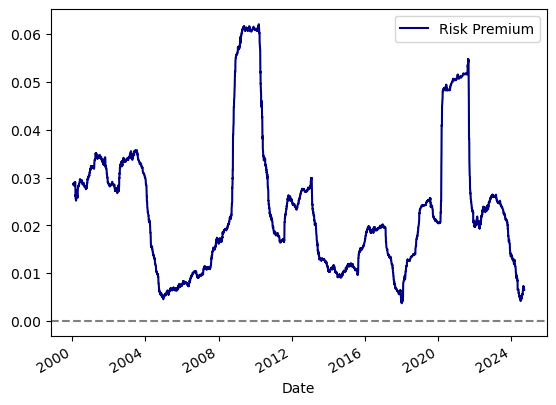

C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\1387234820.py:53: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff.fillna(method='ffill',inplace=True)


Average Implied Earnings Growth: 0.03334433928893182 Average Implied Sales Growth: 0.14171054926858379
Lastest Risk Premium: 0.0065020535391678985 Lastest Priced in Earnings Growth: 0.030929053539167896


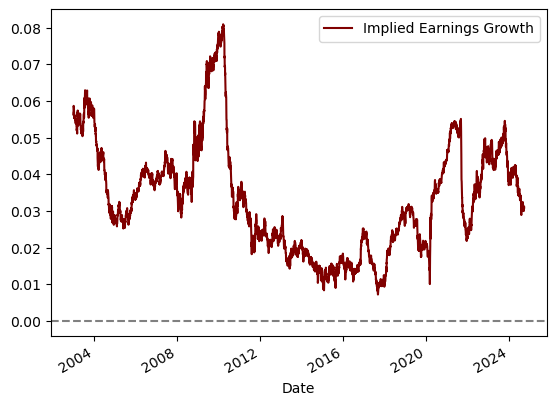

           Date    GDP Qtr  Monthly F/C- Nominal GDP Return  \
5459 2024-09-11 2024-06-30                         0.058011   
5460 2024-09-12 2024-06-30                         0.058011   
5461 2024-09-13 2024-06-30                         0.058011   
5462 2024-09-16 2024-06-30                         0.058011   
5463 2024-09-17 2024-06-30                         0.058011   
5464 2024-09-18 2024-06-30                         0.058011   
5465 2024-09-19 2024-06-30                         0.058011   
5466 2024-09-20 2024-06-30                         0.058011   
5467 2024-09-23 2024-06-30                         0.058011   
5468 2024-09-24 2024-06-30                         0.058011   

      Combo F/C- Nominal GDP Return  Implied Earnings Growth  \
5459                       0.056668                 0.030190   
5460                       0.056668                 0.030446   
5461                       0.056668                 0.030396   
5462                       0.056668               

C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\1387234820.py:86: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mergedf=mergedf.fillna(method='ffill')


In [52]:
def whats_priced_in(roll,forecast):
    
    now=dt.datetime.now()+dt.timedelta(days=1) 
    now=now.strftime('%Y-%m-%d')
    
#dividend yield is calculated through bbg excel spreadsheet
    dvd=pd.read_excel(r'\\Mac\Home\Documents\SPY Dividends.xlsx',sheet_name="Dividends")
    dvd['Date']=pd.to_datetime(dvd['Date'],format='%Y-%m-%d')
    print(dvd.tail(5))

#risk free is the 10Y zero coupon bond price
    data=blp.bdh(tickers=['GT10  Govt',], flds=['last_price'],start_date='1998-08-04',end_date=now)
    data.columns = data.columns.droplevel(-1) #drops one of the column header rows
    data.reset_index(inplace=True)
    data.columns=['Date','10Y Rate']
    data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')    
    data['10Y Price']=100/((1+data['10Y Rate']/100)**10)
    data['10Y Change']=data['10Y Price'].pct_change()   
    data['10Y '+str(roll)+'d Vol']=(data['10Y Change'].rolling(roll).std().shift())*252**0.5
    df10Y=data.copy()


#pulling out price and calculating historical price movements and vol
    data=blp.bdh(tickers=['SPX Index',], flds=['last_price'],start_date='1990-08-04',end_date=now,adjust='all')
    data.columns = data.columns.droplevel(-1) #drops one of the column header rows
    data.reset_index(inplace=True)
    data.columns=['Date','SPX']
    data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d') 
    data['SPX Change']=data['SPX'].pct_change()
    data['SPX '+str(roll)+'d Vol']=(data['SPX Change'].rolling(roll).std().shift())*252**0.5 #getting stdev and vol of past 1 year
    spx=data.copy()

#merging equities and bonds
    diff=df10Y.merge(spx, on="Date",how='outer')
    diff=diff.sort_values(by='Date')
    diff.dropna(inplace=True)
    #diff.dropna(subset=['SPX'],inplace=True)

    diff.to_csv(r'\\Mac\Home\Downloads\diff.csv',index=False)

#risk premium =  0.25 x (diff in vol btw equity and bonds).
    diff['Risk Premium']=0.25*(diff['SPX '+str(roll)+'d Vol']-diff['10Y '+str(roll)+'d Vol'])

    ax = plt.gca()
    diff.plot(kind='line',x='Date',y='Risk Premium',color='navy',ax=ax)
    plt.axhline(y = 0, color = 'grey', linestyle = '--')
    plt.show()
  

#calculating implied earning grwth - bringing in dvd yield
    diff=diff.merge(dvd,on='Date',how='outer')
    diff=diff.sort_values(by='Date')
    diff.fillna(method='ffill',inplace=True)

#calculating priced in earnings growth - Earnings Grwth = risk free + risk premium - divdend yield - P/E ratio chg
#we ignore P/E ratio chg as it's volatile and would change this formula to be more mean reverting, ie a chg from low to high P/E ratio usually means mkt has rallied aggressively and vice versa 
    diff['Implied Earnings Growth']=diff['10Y Rate']/100+ diff['Risk Premium']-diff['Div Yield'].shift()/100 
#implied 1Y sales grwth is using the annualized implied earnings grwth, similar to the way GDP change is calculated. This assumes margins stays flat
    diff['Implied 1Y Sales Growth']=(1+diff['Implied Earnings Growth'])**4-1
    diff=diff[(diff['Date'] > '2003-01-01')]    


    print('Average Implied Earnings Growth:',diff['Implied Earnings Growth'].mean(),'Average Implied Sales Growth:',diff['Implied 1Y Sales Growth'].mean())
    print('Lastest Risk Premium:',diff['Risk Premium'].iloc[-1],'Lastest Priced in Earnings Growth:',diff['Implied Earnings Growth'].iloc[-1])

    ax = plt.gca()
    diff.plot(kind='line',x='Date',y='Implied Earnings Growth',color='maroon',ax=ax)
    plt.axhline(y = 0, color = 'grey', linestyle = '--')
    plt.show()

    writer = pd.ExcelWriter(r'\\Mac\Home\Downloads\Earnings Forecast.xlsx')
  
    diff.to_excel(writer, sheet_name='SPX Forecasts',index=False)  
    writer.close()    

#getting forecasted gdp with dates aligned to latest dates of weekly and monthly data release
    fc=forecast 

    fc['Date']=pd.to_datetime(fc['Date'],format='%Y-%m-%d')
    fc=fc[(fc['Date'] >= '2003-09-16')]
    fc.dropna(inplace=True)
    
    diff['Date']=pd.to_datetime(diff['Date'],format='%Y-%m-%d')
    mergedf=diff.merge(fc,on='Date',how='outer')
    mergedf=mergedf.sort_values(by='Date')
    mergedf=mergedf.fillna(method='ffill')
    mergedf=mergedf[['Date','GDP Qtr','Monthly F/C- Nominal GDP Return','Combo F/C- Nominal GDP Return','Implied Earnings Growth', 'Implied 1Y Sales Growth']]
    print(mergedf.tail(10))
    
    return mergedf
    
priced_in=whats_priced_in(378,forecast)


## Calculating Market Returns

Pulling Market Forecasts and running it against daily SPX prices. Calculating Returns, Volatility and Info Ratio as well as yearly performance and drawdowns

           Date    GDP Qtr  Monthly F/C- Nominal GDP Return  \
3518 2024-09-11 2024-06-30                         0.058011   
3519 2024-09-12 2024-06-30                         0.058011   
3520 2024-09-13 2024-06-30                         0.058011   
3521 2024-09-16 2024-06-30                         0.058011   
3522 2024-09-17 2024-06-30                         0.058011   
3523 2024-09-18 2024-06-30                         0.058011   
3524 2024-09-19 2024-06-30                         0.058011   
3525 2024-09-20 2024-06-30                         0.058011   
3526 2024-09-23 2024-06-30                         0.058011   
3527 2024-09-24 2024-06-30                         0.058011   

      Combo F/C- Nominal GDP Return  Implied Earnings Growth  \
3518                       0.056668                 0.030190   
3519                       0.056668                 0.030446   
3520                       0.056668                 0.030396   
3521                       0.056668               

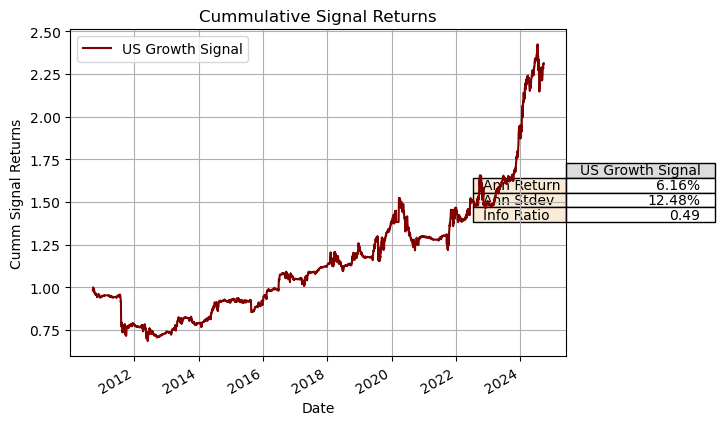

         Date  Annual Returns  Cumm Signal Returns
0  2010-12-31             NaN             0.949058
1  2011-12-31       -0.178846             0.779322
2  2012-12-31       -0.048926             0.741193
3  2013-12-31        0.067339             0.791104
4  2014-12-31        0.160311             0.917927
5  2015-12-31        0.005630             0.923095
6  2016-12-31        0.137918             1.050407
7  2017-12-31        0.073394             1.127500
8  2018-12-31        0.088870             1.227701
9  2019-12-31        0.130701             1.388163
10 2020-12-31       -0.063380             1.300182
11 2021-12-31        0.128472             1.467219
12 2022-12-31        0.021928             1.499391
13 2023-12-31        0.277900             1.916072
14 2024-12-31        0.207398             2.313461
    Year  Drawdowns
1   2011  -0.253118
10  2020  -0.201301
2   2012  -0.124169
12  2022  -0.117223
14  2024  -0.113970
9   2019  -0.112445
8   2018  -0.093232
5   2015  -0.087202
11  

C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\1214695894.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drawdowns['Year']=drawdowns['Date'].dt.year
C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\1214695894.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drawdowns['Max Level'] = drawdowns.groupby('Year')['Cumm Signal Returns'].transform('cummax')
C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\1214695894.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

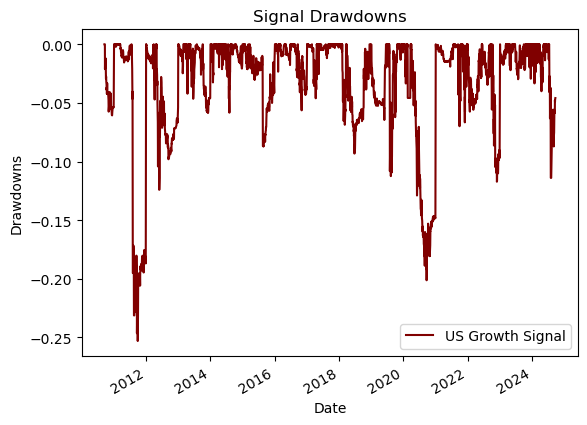

           Date  Signal Strength  Cumm Signal Returns
3508 2024-08-27         0.901372             2.271021
3509 2024-08-28         0.850504             2.270945
3510 2024-08-29         0.811483             2.289545
3511 2024-08-30         0.755524             2.252957
3512 2024-09-03         0.770203             2.250177
3513 2024-09-04         0.791448             2.244802
3514 2024-09-05         0.811000             2.213379
3515 2024-09-06         0.809177             2.234119
3516 2024-09-09         0.801270             2.242126
3517 2024-09-10         0.812165             2.261546
3518 2024-09-11         0.804218             2.275179
3519 2024-09-12         0.770524             2.284659
3520 2024-09-13         0.758713             2.286837
3521 2024-09-16         0.772789             2.287305
3522 2024-09-17         0.736100             2.282428
3523 2024-09-18         0.688787             2.309117
3524 2024-09-19         0.675430             2.306090
3525 2024-09-20         0.60

In [54]:
def market_perf(qtr,roll,cutoff,forecast):
    from datetime import date
    now=dt.datetime.now()+dt.timedelta(days=1)
    now=now.strftime('%Y-%m-%d') 

#pulling in our GDP forecasts, with earnings/sales grwth priced with, adjusted for dates of data release    
    mergedf=forecast.copy()

#calculating BUY/SELL signal based on zscoring our GDP f/c vs Sales Grwth priced in (Using sales as comparing to nominal GDP)
    mergedf['Combo mean']=mergedf['Combo F/C- Nominal GDP Return'].rolling(roll).mean()
    mergedf['Combo std']=mergedf['Combo F/C- Nominal GDP Return'].rolling(roll).std(ddof=0)
    mergedf['Combo- Z-score']=(mergedf['Combo F/C- Nominal GDP Return']-mergedf['Combo mean'])/mergedf['Combo std']   
    
    mergedf['Monthly mean']=mergedf['Monthly F/C- Nominal GDP Return'].rolling(roll).mean()
    mergedf['Monthly std']=mergedf['Monthly F/C- Nominal GDP Return'].rolling(roll).std(ddof=0)
    mergedf['Monthly- Z-score']=(mergedf['Monthly F/C- Nominal GDP Return']-mergedf['Monthly mean'])/mergedf['Monthly std']

    mergedf['Regression- Z-score']=mergedf['Combo- Z-score']

    mergedf['Sales mean']=mergedf['Implied 1Y Sales Growth'].rolling(roll).mean()
    mergedf['Sales std']=mergedf['Implied 1Y Sales Growth'].rolling(roll).std(ddof=0)
    mergedf['Sales- Z-score']=(mergedf['Implied 1Y Sales Growth']-mergedf['Sales mean'])/mergedf['Sales std']
    
#the signal strength is the zscore of the signal (difference btw Regression and sales zscore)
    mergedf['Signal']=mergedf['Regression- Z-score']-mergedf['Sales- Z-score']
    mergedf['Signal Mean']=mergedf['Signal'].rolling(roll).mean()
    mergedf['Signal Stdev']=mergedf['Signal'].rolling(roll).std(ddof=0)
    mergedf['Signal Strength']=(mergedf['Signal']-mergedf['Signal Mean'])/mergedf['Signal Stdev']


#getting SPX and VIX data to calculate market performance
    data=blp.bdh(tickers=['SPX Index','VIX Index',], flds=['last_price'],start_date='2001-08-04',end_date=now,adjust='all')
    data.columns = data.columns.droplevel(-1) #drops one of the column header rows
    data.reset_index(inplace=True)
    data.columns=['Date','SPX','VIX']
    data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')

    mergedf=mergedf.merge(data,on='Date',how='inner')

#calc zscore of VIX to be used later to create an enhanced adj trade signal      
    mergedf['SPX Change']=mergedf['SPX'].pct_change()
    mergedf['VIX Mean']=mergedf['VIX'].rolling(roll).mean()
    mergedf['VIX Stdev']=mergedf['VIX'].rolling(roll).std()
    mergedf['VIX Z-score']=(mergedf['VIX']-mergedf['VIX Mean'])/mergedf['VIX Stdev'] 
    mergedf=mergedf[(mergedf['Date'] >= cutoff)] #cut-off to time of first regression
    mergedf.reset_index(inplace=True,drop=True)
    mergedf.to_csv(r'\\Mac\Home\Downloads\gdp fc impact.csv')
    
    adj=mergedf.copy() #creating a copy for later use



#calculating signal returns
    mergedf['Signal Returns']=mergedf['Signal Strength']*mergedf['SPX Change'].shift(-1) 
    mergedf['Cumm Signal Returns']=(1+mergedf['Signal Returns']).cumprod()
    
# two adjustments, 1 to reduce all sell signal to 50%, and the other to reduce buy signal to 0 only if VIX is high (z-score >3), reasons: overall mkt in upward 
    conditions=[(adj['Signal Strength']<0),(adj['Signal Strength']>0) & (adj['VIX Z-score']>4)]  #multiple if/then conditions in pandas columns
    choices=[0.5,0]                                           #multiple if/then conditions in pandas columns
    adj['Signal Strength']=np.select(conditions,choices,default=1)*adj['Signal Strength']    
#limiting use of leverage
    adj['Signal Strength']= [2 if x>2 else -1. if x<-1. else x for x in adj['Signal Strength']] #if else statement, for column to equal another column on conditions
    
    
    adj['Signal Returns']=adj['Signal Strength']*adj['SPX Change'].shift(-1) 
    adj['Cumm Signal Returns']=(1+adj['Signal Returns']).cumprod() 
    print(adj.tail(10))

        
    
    writer = pd.ExcelWriter(r'\\Mac\Home\Downloads\Signal 1 Results.xlsx')
    mergedf.to_excel(writer, sheet_name='Signal 1',index=False)  
    adj.to_excel(writer, sheet_name='Adj Signal 1',index=False) 
    writer.close()

#getting summary stats
    signalstd=np.std(mergedf['Signal Returns'])*252**0.5
    num=len(mergedf)-1
    days=(mergedf.loc[num,'Date']-mergedf.loc[0,'Date']).days
    signalIRR=mergedf.loc[num-1,'Cumm Signal Returns']**(365/days)-1
    info=signalIRR/signalstd

    adjstd=np.std(adj['Signal Returns'])*252**0.5
    num=len(adj)-1
    days=(adj.loc[num,'Date']-adj.loc[0,'Date']).days
    adjIRR=adj.loc[num-1,'Cumm Signal Returns']**(365/days)-1
    adjinfo=adjIRR/adjstd

    table_rows=['Ann Return','Ann Stdev','Info Ratio']
    table_val=[['{:.2%}'.format(adjIRR,)],['{:.2%}'.format(adjstd)],['{:.2f}'.format(adjinfo)]]
    table=plt.table(cellText=table_val,colWidths=[0.3]*3,
                    rowColours=["antiquewhite"] * 3, 
                    colColours=["gainsboro"]*1,
                    colLabels=(['US Growth Signal']),
                    rowLabels=table_rows,
                    loc='right')

    ax = plt.gca()
    #mergedf.plot(kind='line',x='Date',y='Cumm Signal Returns',color='maroon',label='Signal 1',ax=ax)
    adj.plot(kind='line',x='Date',y='Cumm Signal Returns',color='maroon',label='US Growth Signal',ax=ax)
    plt.xlabel('Date')
    plt.ylabel('Cumm Signal Returns')
    plt.title('Cummulative Signal Returns')         
    plt.grid()
    plt.show()
 
    annual=mergedf[['Date','Cumm Signal Returns']].copy()
    annual=annual.set_index('Date').resample('Y').agg({'Cumm Signal Returns': "last"})
    annual.reset_index(inplace=True)
    annual['Annual Returns']=annual['Cumm Signal Returns'].pct_change()
    annual=annual[['Date','Annual Returns','Cumm Signal Returns']]

    adjannual=adj[['Date','Cumm Signal Returns']].copy()
    adjannual=adjannual.set_index('Date').resample('Y').agg({'Cumm Signal Returns': "last"})
    adjannual.reset_index(inplace=True)
    adjannual['Annual Returns']=adjannual['Cumm Signal Returns'].pct_change()
    adjannual=adjannual[['Date','Annual Returns','Cumm Signal Returns']]
    

    print(adjannual)
    
    #max drawdowns by year
    drawdowns=mergedf[['Date','Cumm Signal Returns']]
    drawdowns['Year']=drawdowns['Date'].dt.year
    drawdowns['Max Level'] = drawdowns.groupby('Year')['Cumm Signal Returns'].transform('cummax')
    drawdowns['Drawdowns']=drawdowns['Cumm Signal Returns']/drawdowns['Max Level']-1
    
    ddstats=drawdowns.loc[drawdowns.groupby(['Max Level']).Drawdowns.idxmin()].reset_index(drop=True) 
    ddstats=ddstats.set_index('Date').resample('Y').min()
    ddstats.reset_index(inplace=True)
    ddstats=ddstats.sort_values(by='Drawdowns',ascending=True)
    ddstats=ddstats[['Year','Drawdowns']]

    
    drawdowns1=adj[['Date','Cumm Signal Returns']]
    drawdowns1['Year']=drawdowns1['Date'].dt.year
    drawdowns1['Max Level'] = drawdowns1.groupby('Year')['Cumm Signal Returns'].transform('cummax')
    drawdowns1['Drawdowns']=drawdowns1['Cumm Signal Returns']/drawdowns1['Max Level']-1

    ddstats=drawdowns1.loc[drawdowns1.groupby(['Max Level']).Drawdowns.idxmin()].reset_index(drop=True) #aggregate by Max Level
    ddstats=ddstats.set_index('Date').resample('Y').min()
    ddstats.reset_index(inplace=True)
    ddstats=ddstats.sort_values(by='Drawdowns',ascending=True)
    ddstats=ddstats[['Year','Drawdowns']]
    print(ddstats)

    
    ax = plt.gca()
    #drawdowns.plot(kind='line',x='Date',y='Drawdowns',color='maroon',ax=ax,label='Signal 1')
    drawdowns1.plot(kind='line',x='Date',y='Drawdowns',color='maroon',ax=ax,label='US Growth Signal')
    plt.xlabel('Date')
    plt.ylabel('Drawdowns')
    plt.title('Signal Drawdowns')

    plt.show()
    
    trade=adj[['Date','Signal Strength','Cumm Signal Returns']].copy()
    print(trade.tail(20))
    return (mergedf,adj)

qtr='2024-09-30'
#(qtr-end,# of days to use to calc mean and stdev, cutoff date)
signal1, signaladj= market_perf(qtr,252,'2010-09-17',priced_in)
    

In [55]:
def combined_returns():

    now=dt.datetime.now()+dt.timedelta(days=1)
    now=now.strftime('%Y-%m-%d') 

    signal1=pd.read_excel(r'\\Mac\Home\Downloads\Signal 1 Results.xlsx',sheet_name='Adj Signal 1')
    signal1['Date']=pd.to_datetime(signal1['Date'],format='%Y-%m-%d')
    signal1.rename(columns={'Signal Returns':'Signal1 Returns'},inplace=True) 
    signal1.rename(columns={'Signal Strength':'Signal1 Strength'},inplace=True) 
    signal1=signal1[['Date','Signal1 Strength','Signal1 Returns']]
    
    uscpi=pd.read_csv(r'\\Mac\Home\Downloads\US combined output gap result.csv',index_col=False)
    uscpi['Date']=pd.to_datetime(uscpi['Date'],format='%Y-%m-%d')
    uscpi.rename(columns={'Output Gap return':'US CPI Returns'},inplace=True)
    uscpi.rename(columns={'Combined Strength':'US CPI Strength'},inplace=True)
    uscpi=uscpi[['Date','US CPI Strength','US CPI Returns']]
    
    ukcpi=pd.read_csv(r'\\Mac\Home\Downloads\UK combined output gap result.csv',index_col=False)
    ukcpi['Date']=pd.to_datetime(ukcpi['Date'],format='%Y-%m-%d')
    ukcpi.rename(columns={'Output Gap return':'UK CPI Returns'},inplace=True)
    ukcpi.rename(columns={'Combined Strength':'UK CPI Strength'},inplace=True)   
    ukcpi=ukcpi[['Date','UK CPI Strength','UK CPI Returns']]
    
    macd=pd.read_csv(r'\\Mac\Home\Downloads\momtest.csv',index_col=False)
    macd['Date']=pd.to_datetime(macd['Date'],format='%Y-%m-%d')
    macd.rename(columns={'Combined Signal Returns':'MOM Returns'},inplace=True)
    macd.rename(columns={'Combined Signal Strength':'MOM Strength'},inplace=True)
    macd=macd[['Date','MOM Strength','MOM Returns']]

    df_list=[signal1,uscpi,ukcpi,macd]
    combined= reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), df_list)

    combined=combined.sort_values(by='Date')
    combined=combined[(combined['Date'] >= '2011-02-15')]
    combined.fillna(0,inplace=True)
    combined.reset_index(inplace=True,drop=True)
    combined['Signal1 Level']=(1+combined['Signal1 Returns']).cumprod()
    combined['US CPI Level']=(1+combined['US CPI Returns']).cumprod()
    combined['UK CPI Level']=(1+combined['UK CPI Returns']).cumprod()
    combined['MOM Level']=(1+combined['MOM Returns']).cumprod()

    corrdf=combined[['Signal1 Strength','MOM Strength','US CPI Strength','UK CPI Strength']]
    print(corrdf.corr())
#combine the use of leverage
    leverage=2
    print('Leverage',leverage)

#getting risk free rate
    data=blp.bdh(tickers=['US0003M Index',], flds=['last_price'],start_date='2011-02-15',end_date=now)
    data.columns = data.columns.droplevel(-1) #drops one of the column header rows
    data.reset_index(inplace=True)
    data.columns=['Date','Risk Free']
    data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')        
    new_row=pd.DataFrame({'Date':dt.datetime.strptime('2011-02-15','%Y-%m-%d')},index=[0])

#calculating combined return and cost of leverage and risk free rate (for sharpe ratio)
    combined=combined.merge(data,on='Date',how='inner') 
    combined['Combined Strength']=(leverage)*(combined['Signal1 Strength']*0.15+combined['US CPI Strength']*0.45+combined['UK CPI Strength']*0.25+combined['MOM Strength']*0.15)

#calculating daily cost of interest depending on whether overall long or short (since you will receive less interest than you pay)    
    conditions=[(combined['Combined Strength']<0)]  #multiple if/then conditions in pandas columns
    choices=[((combined['Date']-combined['Date'].shift()).dt.days*((combined['Risk Free']/100)/365))] 
    combined['Daily Cost of Leverage']=np.select(conditions,choices,default=((combined['Date']-combined['Date'].shift()).dt.days*((combined['Risk Free']/100+0.015)/365)))
    combined['Daily Cost of Leverage']= pd.to_numeric(combined['Daily Cost of Leverage'], errors='coerce')
    combined.dropna(subset=['Daily Cost of Leverage'],inplace=True)
    combined.reset_index(inplace=True,drop=True)

    combined['Combined Returns']=leverage*(combined['Signal1 Returns']*0.15+combined['US CPI Returns']*0.45+combined['UK CPI Returns']*0.25+combined['MOM Returns']*0.15)
    combined['Leverage Cost + RF']=combined['Daily Cost of Leverage']*(leverage)*(combined['Signal1 Strength']*0.15+combined['US CPI Strength']*0.45+combined['UK CPI Strength']*0.25+combined['MOM Strength']*0.15)
    combined['Combined Returns']=combined['Combined Returns']-combined['Leverage Cost + RF']
    combined['Combined Level']=(1+combined['Combined Returns']).cumprod()


    std=np.std(combined['Combined Returns'])*252**0.5
    num=len(combined)-1
    days=(combined.loc[num,'Date']-combined.loc[0,'Date']).days
    IRR=combined.loc[num-1,'Combined Level']**(365/days)-1
    info=IRR/std

    table_rows=['Ann Return','Ann Stdev','Sharpe Ratio']
    table_val=[['{:.2%}'.format(IRR,)],['{:.2%}'.format(std)],['{:.2f}'.format(info)]]
    table=plt.table(cellText=table_val,colWidths=[0.15]*4,
                    rowColours=["antiquewhite"] * 4, 
                    colColours=["gainsboro"],
                    colLabels=('Combined Signal'),
                    rowLabels=table_rows,
                    loc='right')

    ax = plt.gca()
    combined.plot(kind='line',x='Date',y='Combined Level',color='navy',label='Combined Signal',ax=ax)
    combined.plot(kind='line',x='Date',y='Signal1 Level',style='--',color='maroon',label='US Growth',ax=ax)
    combined.plot(kind='line',x='Date',y='US CPI Level',style='--',color='blue',label='US CPI',ax=ax)
    combined.plot(kind='line',x='Date',y='UK CPI Level',style='--',color='pink',label='UK CPI',ax=ax)
    combined.plot(kind='line',x='Date',y='MOM Level',style='--',color='orange',label='Momentum',ax=ax)
    
    plt.xlabel('Date')
    plt.ylabel('Cummulative Signal Returns')
    plt.title('Cummulative Signal Returns')         
    plt.grid()
    plt.show()

    annual=combined.copy()
    annual=annual.set_index('Date').resample('Y').agg({'Combined Level': "last"})
    annual.reset_index(inplace=True)
    annual['Annual Returns']=annual['Combined Level'].pct_change()
    annual=annual[['Date','Annual Returns','Combined Level']]
    print(annual)
        
    drawdowns=combined[['Date','Combined Level']]
    drawdowns['Year']=drawdowns['Date'].dt.year
    drawdowns['Max Level'] = drawdowns.groupby('Year')['Combined Level'].transform('cummax')
    drawdowns['Drawdowns']=drawdowns['Combined Level']/drawdowns['Max Level']-1

    ddstats=drawdowns.loc[drawdowns.groupby(['Max Level']).Drawdowns.idxmin()].reset_index(drop=True) 
    ddstats=ddstats.set_index('Date').resample('Y').min()
    ddstats.reset_index(inplace=True)
    ddstats=ddstats.sort_values(by='Drawdowns',ascending=True)
    ddstats=ddstats[['Year','Drawdowns']]
    print(ddstats)
    combined.to_csv(r'\\Mac\Home\Downloads\combined results.csv',index=False)
#combined_returns()

latest f/c:  2024-09-30 00:00:00


C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\2067978622.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datesdf.fillna(method="ffill",axis=1,inplace=True)


      GDP Qtr        Date  Monthly F/C- Nominal GDP Return  \
75 2022-06-30  2022-06-17                         0.073453   
76 2022-09-30  2022-09-15                         0.042600   
77 2022-12-31  2022-12-15                         0.045941   
78 2023-03-31  2023-03-17                         0.047076   
79 2023-06-30  2023-06-15                         0.013972   
80 2023-09-30  2023-09-15                         0.039101   
81 2023-12-31  2023-12-15                         0.050022   
82 2024-03-31  2024-03-15                         0.033601   
83 2024-06-30  2024-07-09                         0.058011   
84 2024-09-30  2024-09-25                         0.049087   

    Combo F/C- Nominal GDP Return  
75                       0.075077  
76                       0.035702  
77                       0.038341  
78                       0.040822  
79                       0.012391  
80                       0.023082  
81                       0.044349  
82                       0.03

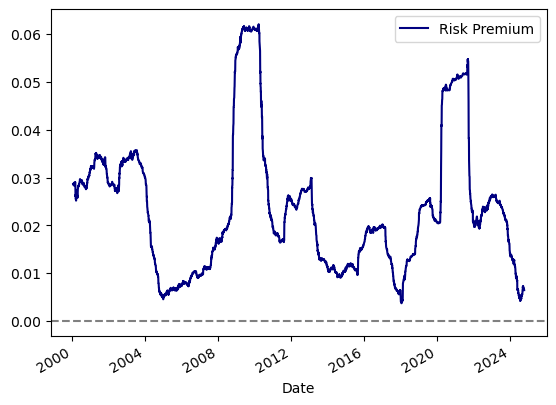

C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\1387234820.py:53: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diff.fillna(method='ffill',inplace=True)


Average Implied Earnings Growth: 0.033342519216382274 Average Implied Sales Growth: 0.14170115824466017
Lastest Risk Premium: 0.006465449634815799 Lastest Priced in Earnings Growth: 0.030826449634815796


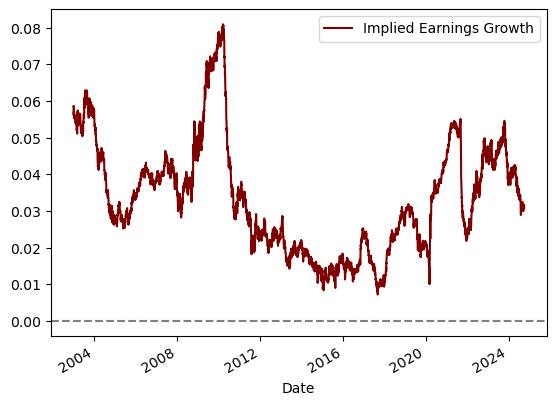

C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\1387234820.py:86: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mergedf=mergedf.fillna(method='ffill')


           Date    GDP Qtr  Monthly F/C- Nominal GDP Return  \
5464 2024-09-18 2024-06-30                         0.058011   
5465 2024-09-19 2024-06-30                         0.058011   
5466 2024-09-20 2024-06-30                         0.058011   
5467 2024-09-23 2024-06-30                         0.058011   
5468 2024-09-24 2024-06-30                         0.058011   
5469 2024-09-25 2024-09-30                         0.049087   
5470 2024-09-26 2024-09-30                         0.049087   
5471 2024-09-27 2024-09-30                         0.049087   
5472 2024-09-30 2024-09-30                         0.049087   
5473 2024-10-01 2024-09-30                         0.049087   

      Combo F/C- Nominal GDP Return  Implied Earnings Growth  \
5464                       0.056668                 0.030639   
5465                       0.056668                 0.030580   
5466                       0.056668                 0.031268   
5467                       0.056668               

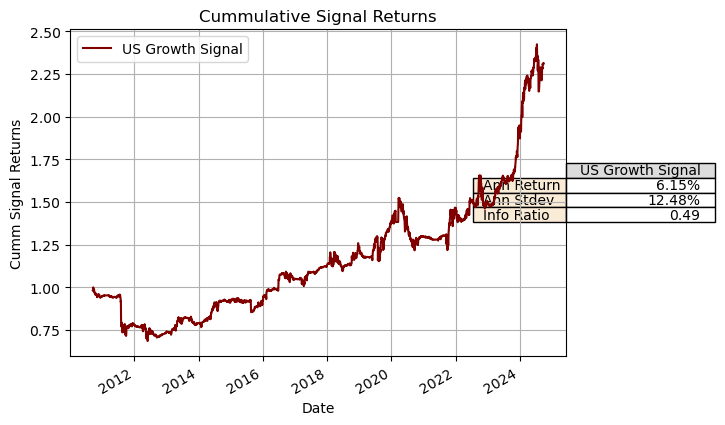

         Date  Annual Returns  Cumm Signal Returns
0  2010-12-31             NaN             0.949058
1  2011-12-31       -0.178846             0.779322
2  2012-12-31       -0.048926             0.741193
3  2013-12-31        0.067339             0.791104
4  2014-12-31        0.160311             0.917927
5  2015-12-31        0.005630             0.923095
6  2016-12-31        0.137918             1.050407
7  2017-12-31        0.073394             1.127500
8  2018-12-31        0.088870             1.227701
9  2019-12-31        0.130701             1.388163
10 2020-12-31       -0.063380             1.300182
11 2021-12-31        0.128472             1.467219
12 2022-12-31        0.021928             1.499391
13 2023-12-31        0.277900             1.916072
14 2024-12-31        0.206475             2.311694
    Year  Drawdowns
1   2011  -0.253118
10  2020  -0.201301
2   2012  -0.124169
12  2022  -0.117223
14  2024  -0.113970
9   2019  -0.112445
8   2018  -0.093232
5   2015  -0.087202
11  

C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\1214695894.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drawdowns['Year']=drawdowns['Date'].dt.year
C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\1214695894.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drawdowns['Max Level'] = drawdowns.groupby('Year')['Cumm Signal Returns'].transform('cummax')
C:\Users\miranda\AppData\Local\Temp\ipykernel_5888\1214695894.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

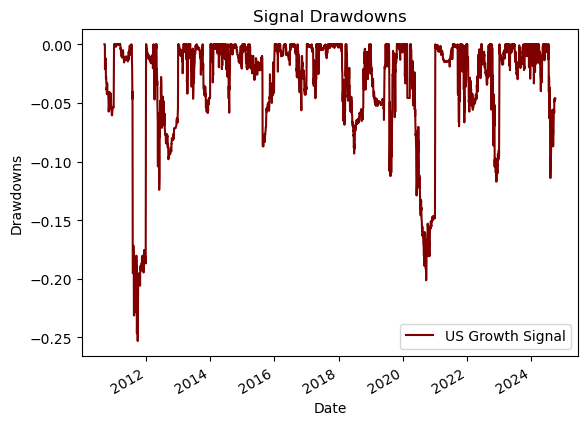

           Date  Signal Strength  Cumm Signal Returns
3513 2024-09-04         0.791448             2.244802
3514 2024-09-05         0.811000             2.213379
3515 2024-09-06         0.809177             2.234119
3516 2024-09-09         0.801270             2.242126
3517 2024-09-10         0.812165             2.261546
3518 2024-09-11         0.804218             2.275179
3519 2024-09-12         0.770524             2.284659
3520 2024-09-13         0.758713             2.286837
3521 2024-09-16         0.772789             2.287305
3522 2024-09-17         0.736100             2.282428
3523 2024-09-18         0.688787             2.309117
3524 2024-09-19         0.675430             2.306090
3525 2024-09-20         0.607088             2.310023
3526 2024-09-23         0.592736             2.313461
3527 2024-09-24         0.599489             2.310880
3528 2024-09-25        -0.017987             2.310712
3529 2024-09-26        -0.028981             2.310796
3530 2024-09-27        -0.02

In [109]:
#Programs to Run

#1. To be run around the 2nd-3rd week of the last month of the quarter (The earliest is 14th, latest is 24th but has gone to the 1st of the following mos)

#retail,retailq=retail_sales()
#constr,constrq=construction()
#trade,tradeq=trade()
#businv,businvq=bus_inv()
#permitsdf=permits()
#nfpdf=nfp()
#joltsdf=jolts()
#houseq,healthq=cpi()
#ipdf=ip()

#once the above has been retrieve, can extrapolate GDP
start_date = "2024-01-01"
end_date = "2024-10-01"
dates=pd.date_range(start_date, end_date, freq='Q')
#for d in dates:
 #   OLS,ridge,full,data=Regression_monthly_gdp(d,retailq,constrq,businvq,tradeq,gdpdf)
  #  OLS_combo, ridge_combo= regression_combined_gdp(d,data,full,gdpdf,permitsdf,ipdf,joltsdf,nfpdf,houseq,healthq)

print("latest f/c: ",ridge_combo['Date'].iloc[-1])
#adjust the date of the forecast to the latest date of monthly and weekly data that was retrieved
forecast=forecast_with_dates(ridge,ridge_combo)

#2. Run on the 3rd week following the end of the qtr, this goes into the regression model to help it refine itself going forward

#gdpdf=gdp()

#3. To be run everyday
priced_in=whats_priced_in(378,forecast)

qtr="2024-09-30"

#(qtr-end,# of days to use to calc mean and stdev, cutoff date)
signal1, signaladj= market_perf(qtr,252,'2010-09-17',priced_in)

